In [1]:
pip install pywaffle

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install lightgbm

Note: you may need to restart the kernel to use updated packages.


In [3]:
# 기본 라이브러리
import numpy as np
import pandas as pd

# 시각화 라이브러리
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objs as go
from pywaffle import Waffle

# 데이터 전처리 라이브러리
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

# 모델링 라이브러리
from sklearn.linear_model import LogisticRegression 
from sklearn.svm import SVC , LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB , BernoulliNB
from lightgbm import LGBMClassifier

# 모델 평가 및 파라미터 튜닝 라이브러리
from sklearn.metrics import precision_score,accuracy_score, classification_report, plot_confusion_matrix, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [4]:
# 데이터 불러오기
df = pd.read_csv('./water_potability.csv')
df 
# ID가 없어서 삭제 안해도 됨

ph    Hardness        Solids  Chloramines     Sulfate  \
0          NaN  204.890455  20791.318981     7.300212  368.516441   
1     3.716080  129.422921  18630.057858     6.635246         NaN   
2     8.099124  224.236259  19909.541732     9.275884         NaN   
3     8.316766  214.373394  22018.417441     8.059332  356.886136   
4     9.092223  181.101509  17978.986339     6.546600  310.135738   
...        ...         ...           ...          ...         ...   
3271  4.668102  193.681735  47580.991603     7.166639  359.948574   
3272  7.808856  193.553212  17329.802160     8.061362         NaN   
3273  9.419510  175.762646  33155.578218     7.350233         NaN   
3274  5.126763  230.603758  11983.869376     6.303357         NaN   
3275  7.874671  195.102299  17404.177061     7.509306         NaN   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       564.308654       10.379783        86.990970   2.963135           0  
1       592.885359       15.180013        56.329076   4.500656           0  
2       418.606213       16.868637        66.420093   3.055934           0  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
...            ...             ...              ...        ...         ...  
3271    526.424171       13.894419        66.687695   4.435821           1  
3272    392.449580       19.903225              NaN   2.798243           1  
3273    432.044783       11.039070        69.845400   3.298875           1  
3274    402.883113       11.168946        77.488213   4.708658           1  
3275    327.459760       16.140368        78.698446   2.309149           1  

[3276 rows x 10 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [6]:
# 결측치
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [7]:
# axis=0 : 결측값이 있는 행 제거
# axis=1 : 결측값이 있는 열 제거
df = df.dropna(axis=0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2011 entries, 3 to 3271
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2011 non-null   float64
 1   Hardness         2011 non-null   float64
 2   Solids           2011 non-null   float64
 3   Chloramines      2011 non-null   float64
 4   Sulfate          2011 non-null   float64
 5   Conductivity     2011 non-null   float64
 6   Organic_carbon   2011 non-null   float64
 7   Trihalomethanes  2011 non-null   float64
 8   Turbidity        2011 non-null   float64
 9   Potability       2011 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 172.8 KB


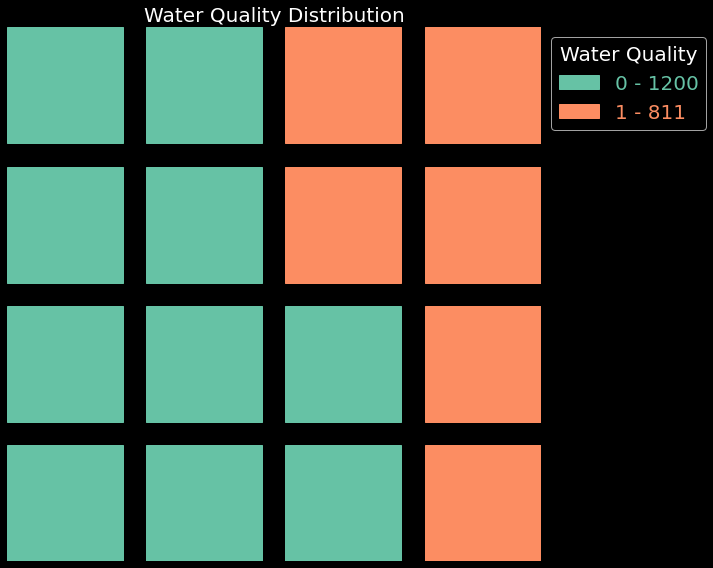

In [9]:
from pywaffle import Waffle
Potability = df['Potability'].value_counts()
plt.style.use('dark_background')

fig = plt.figure(
    FigureClass = Waffle, 
    rows = 4,
    columns = 4,
    values = Potability,
    labels = ['{} - {}'.format(a, b) for a, b in zip(Potability.index, Potability)],
    legend = {
        'loc': 'upper left', 
        'bbox_to_anchor': (1, 1), 
        'fontsize': 20, 
        'labelcolor': 'linecolor',
        'title': 'Water Quality',
        'title_fontsize': 20, 
        },
    font_size = 60, 
    icon_legend = True,
    figsize = (10, 8),
)

plt.title('Water Quality Distribution', fontsize = 20)
plt.show()

In [10]:
# 히스토그램, 박스 차트, 밀도 함수 
plt.style.use('default')
def feature_viz(feature):
    plt.figure(figsize=(15,8))
    plt.title(f'{feature} hist plot')
    plt.subplot(1,3,1)
    df[feature].plot(kind='hist', color='b')

    plt.subplot(1,3,2)
    plt.title(f'{feature} box plot')
    sns.boxplot(df[feature], hue=df['Potability'], color='blue')
    
    plt.subplot(1, 3, 3)
    plt.title(f'{feature} density plot')
    sns.kdeplot(df[feature], hue=df['Potability'])
    plt.tight_layout()

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\user\anaconda3\lib\site-p

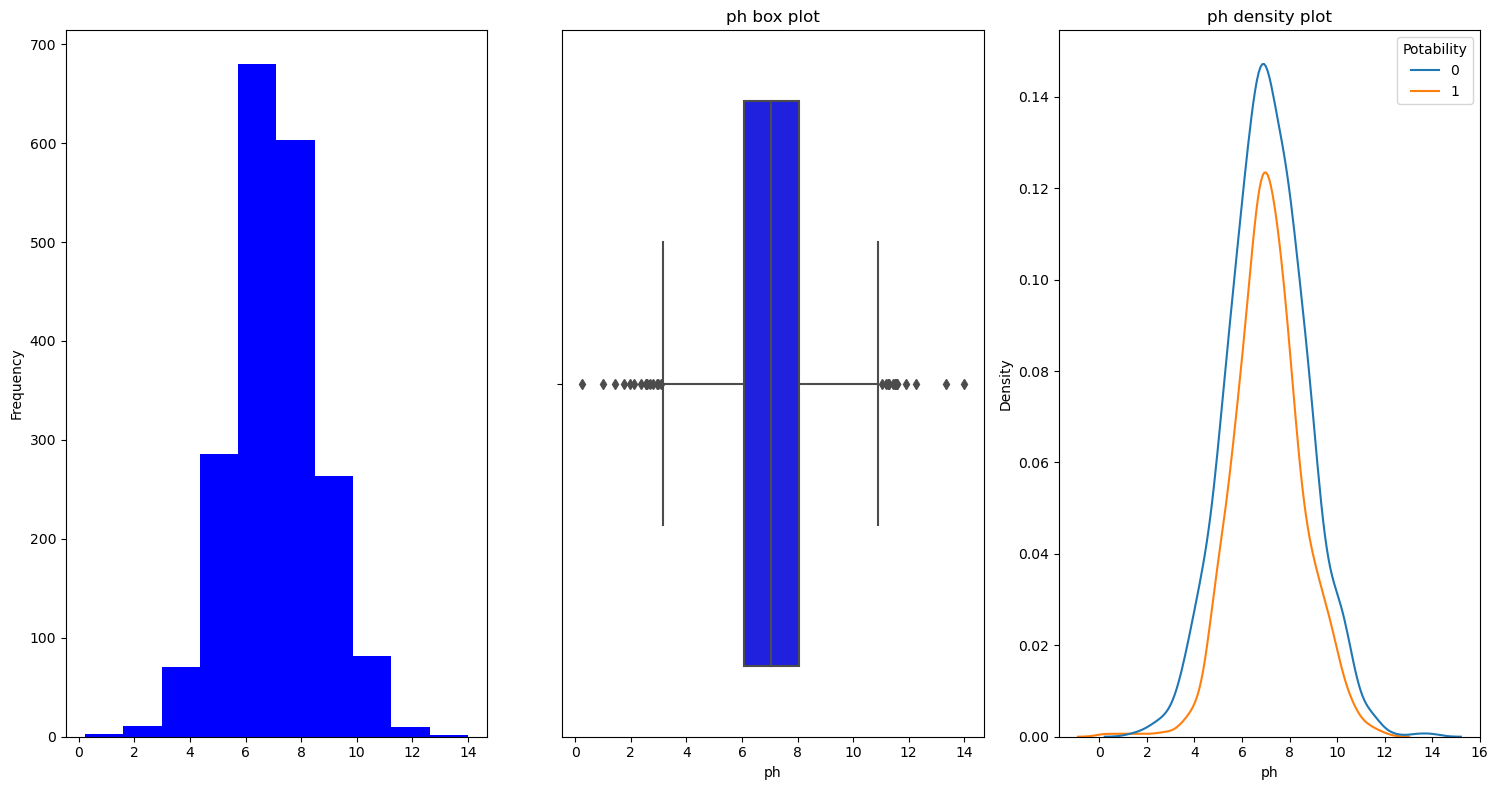

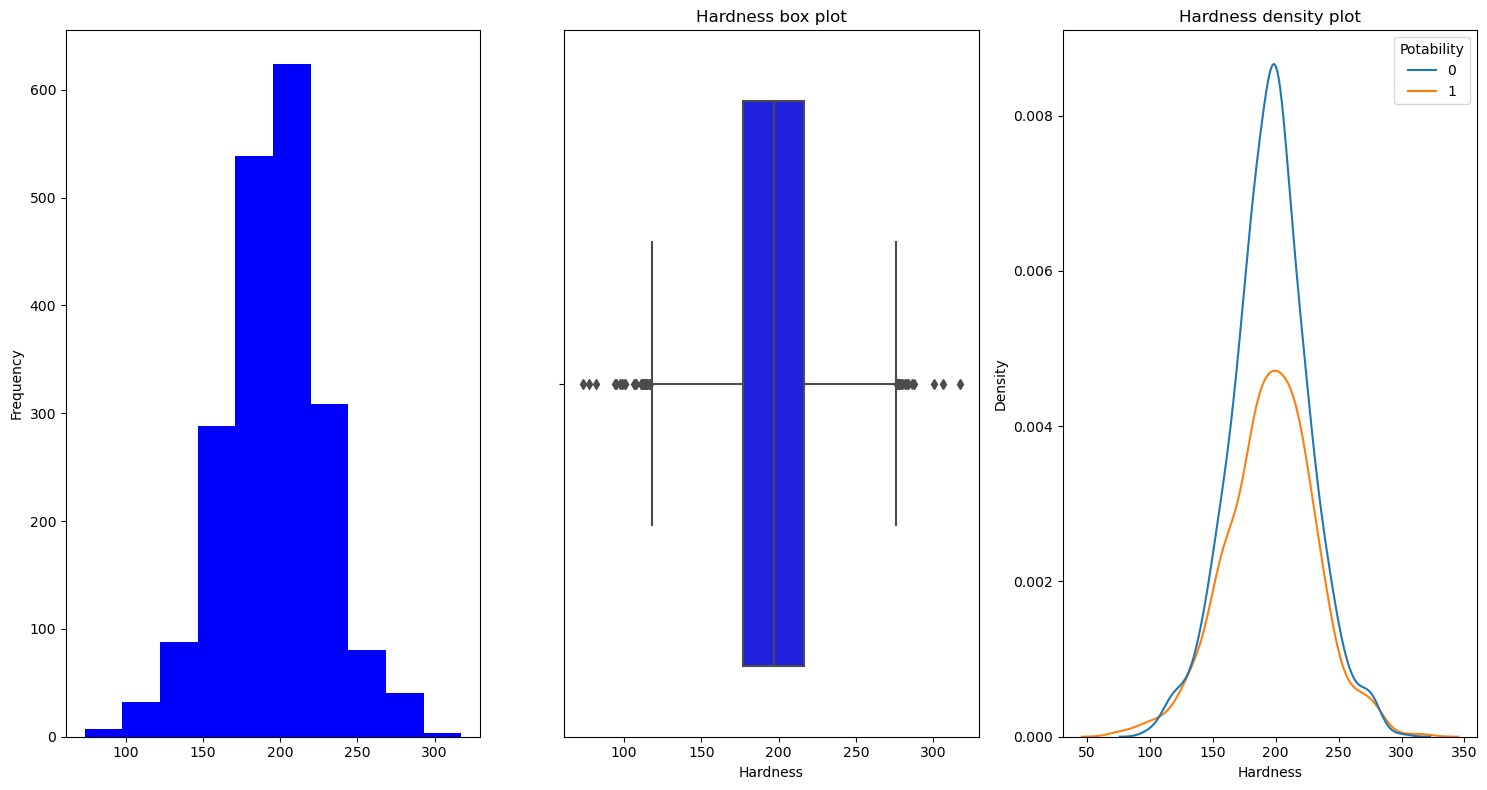

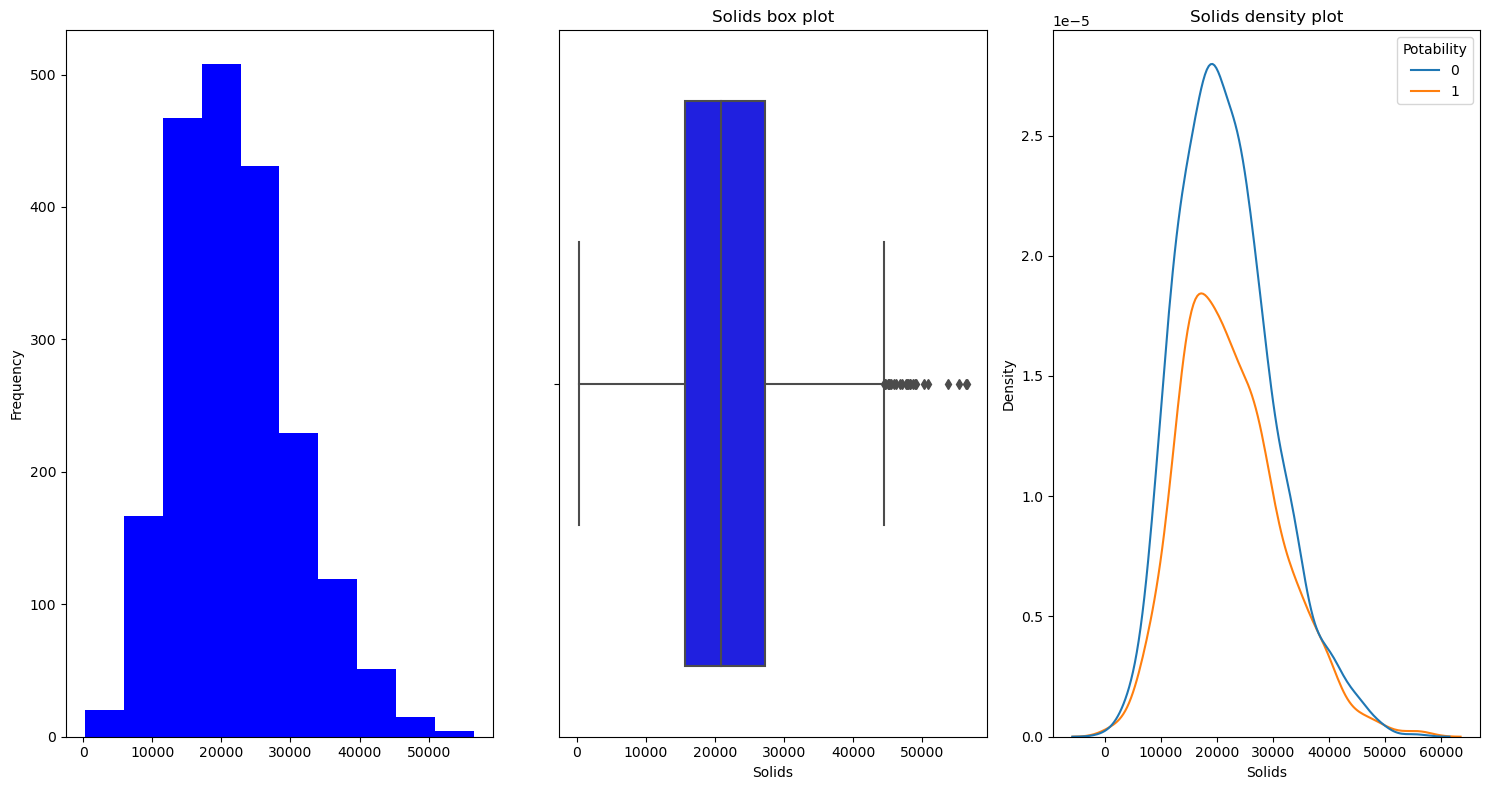

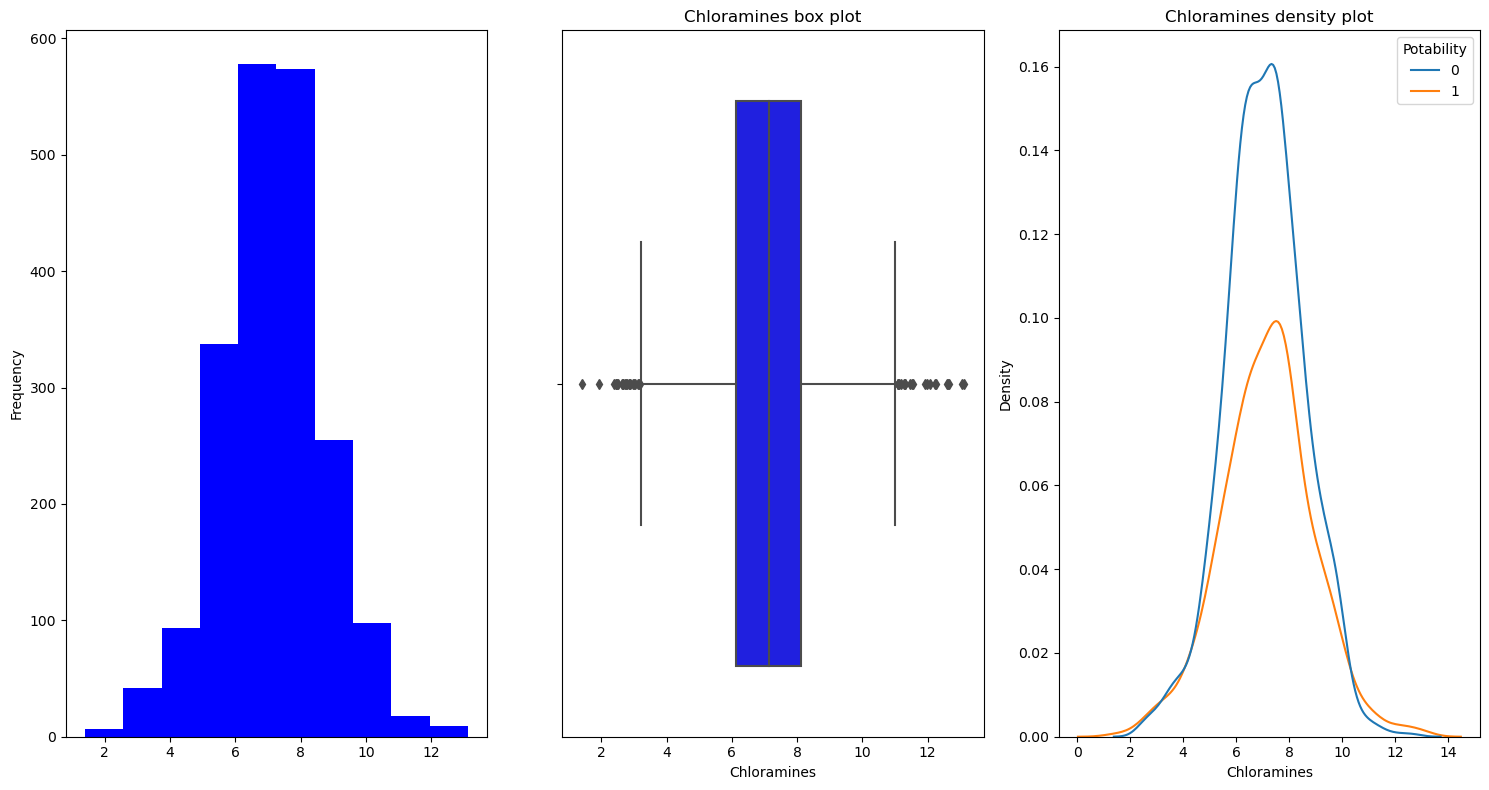

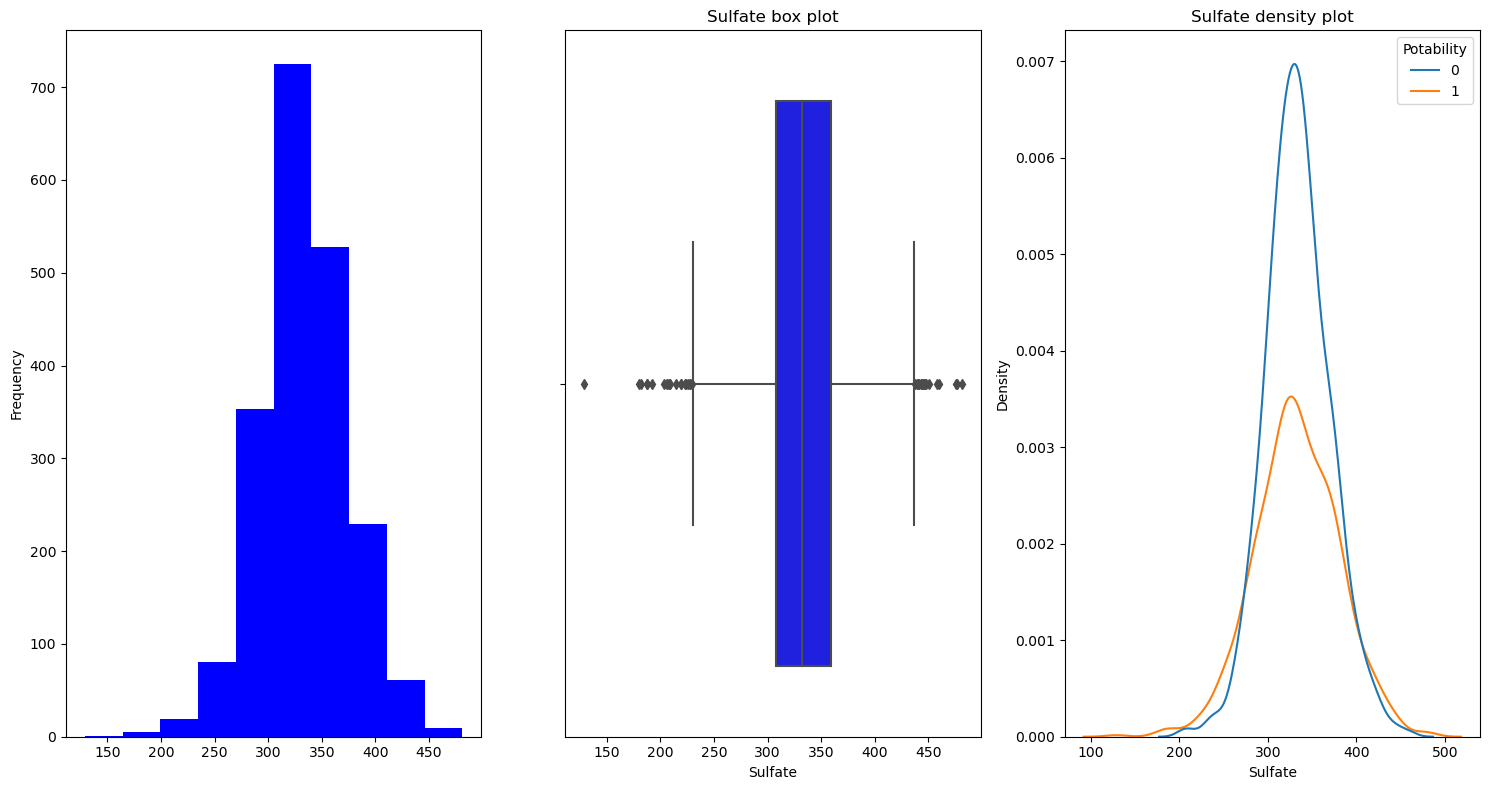

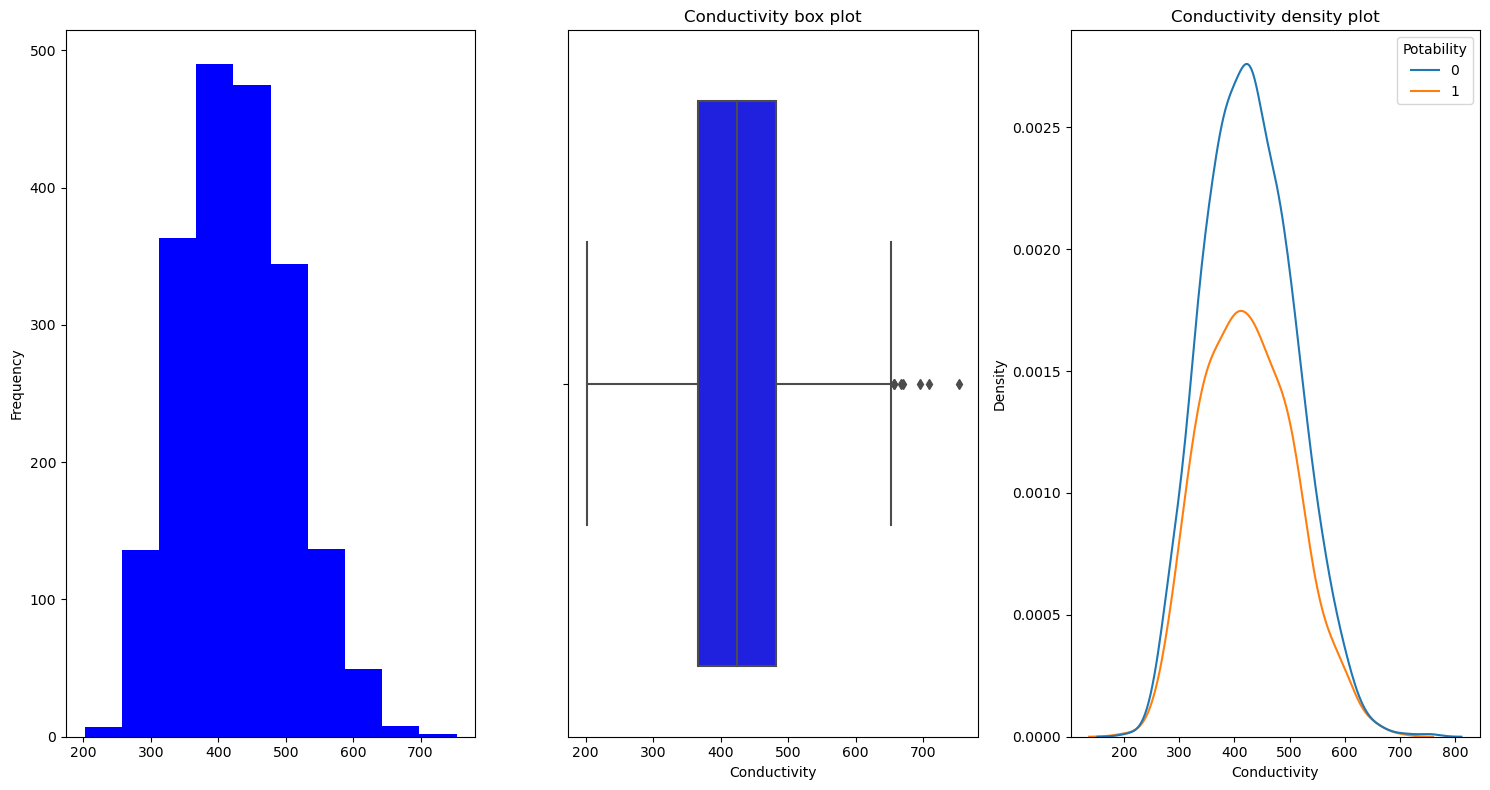

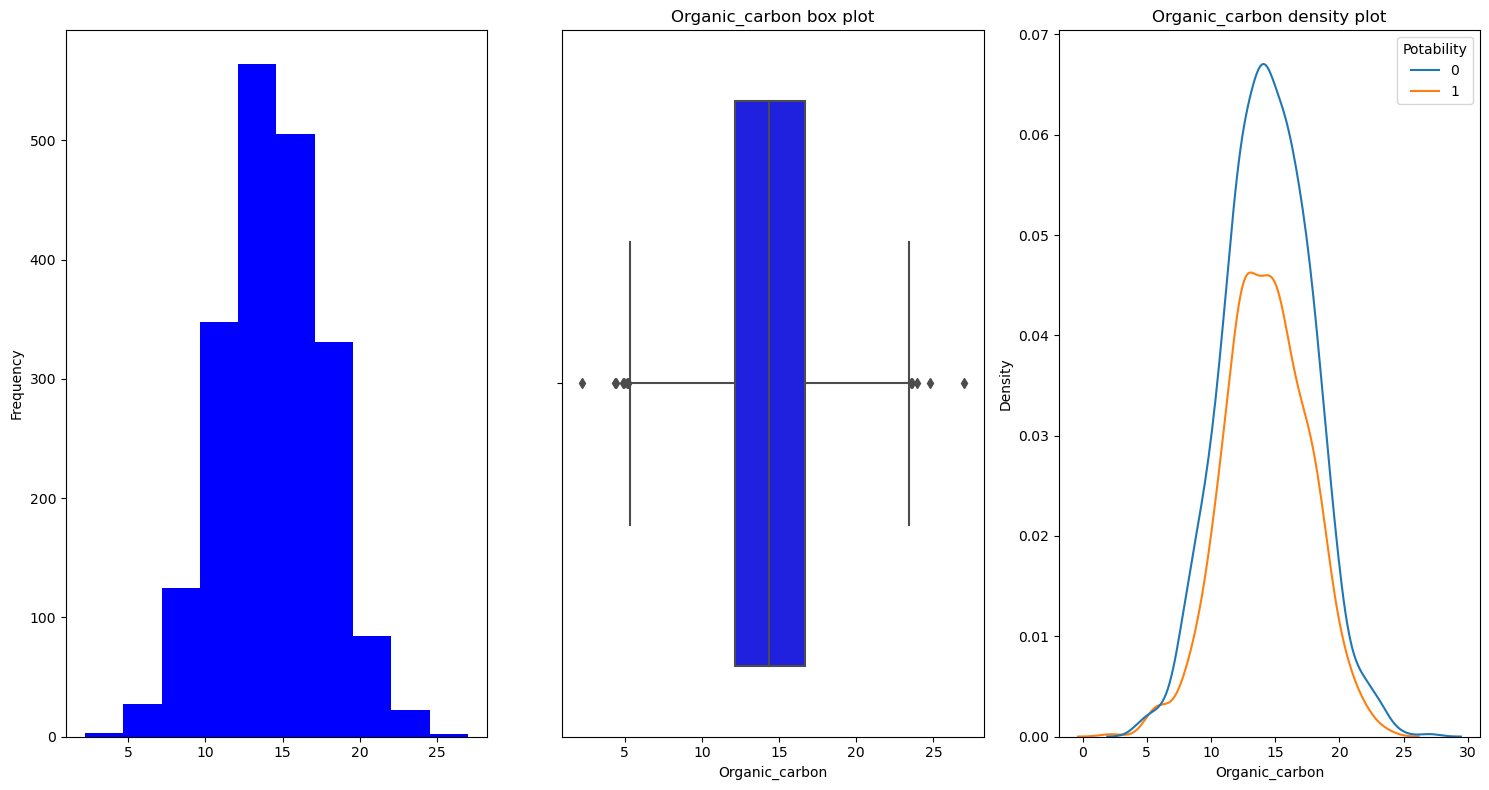

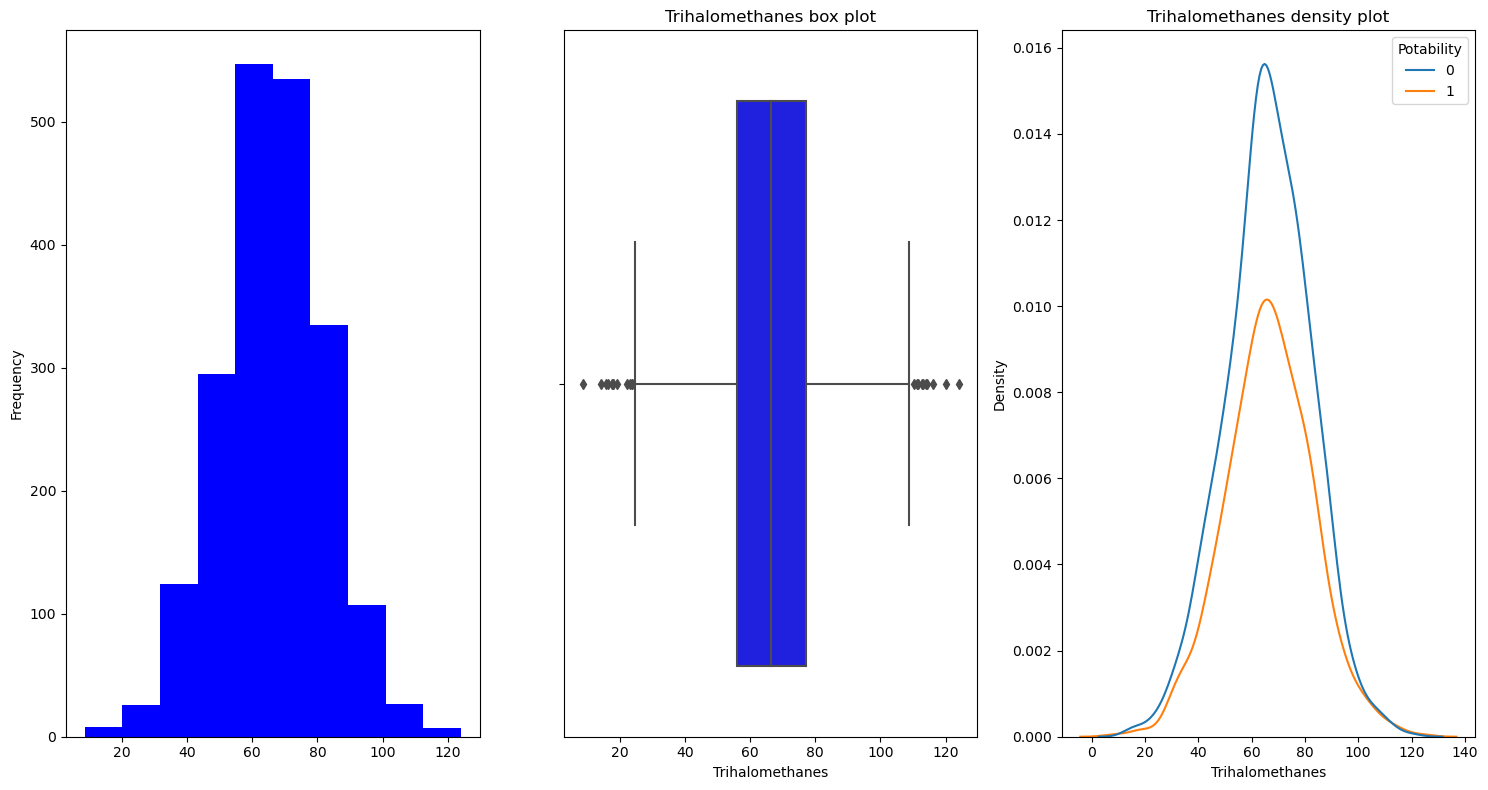

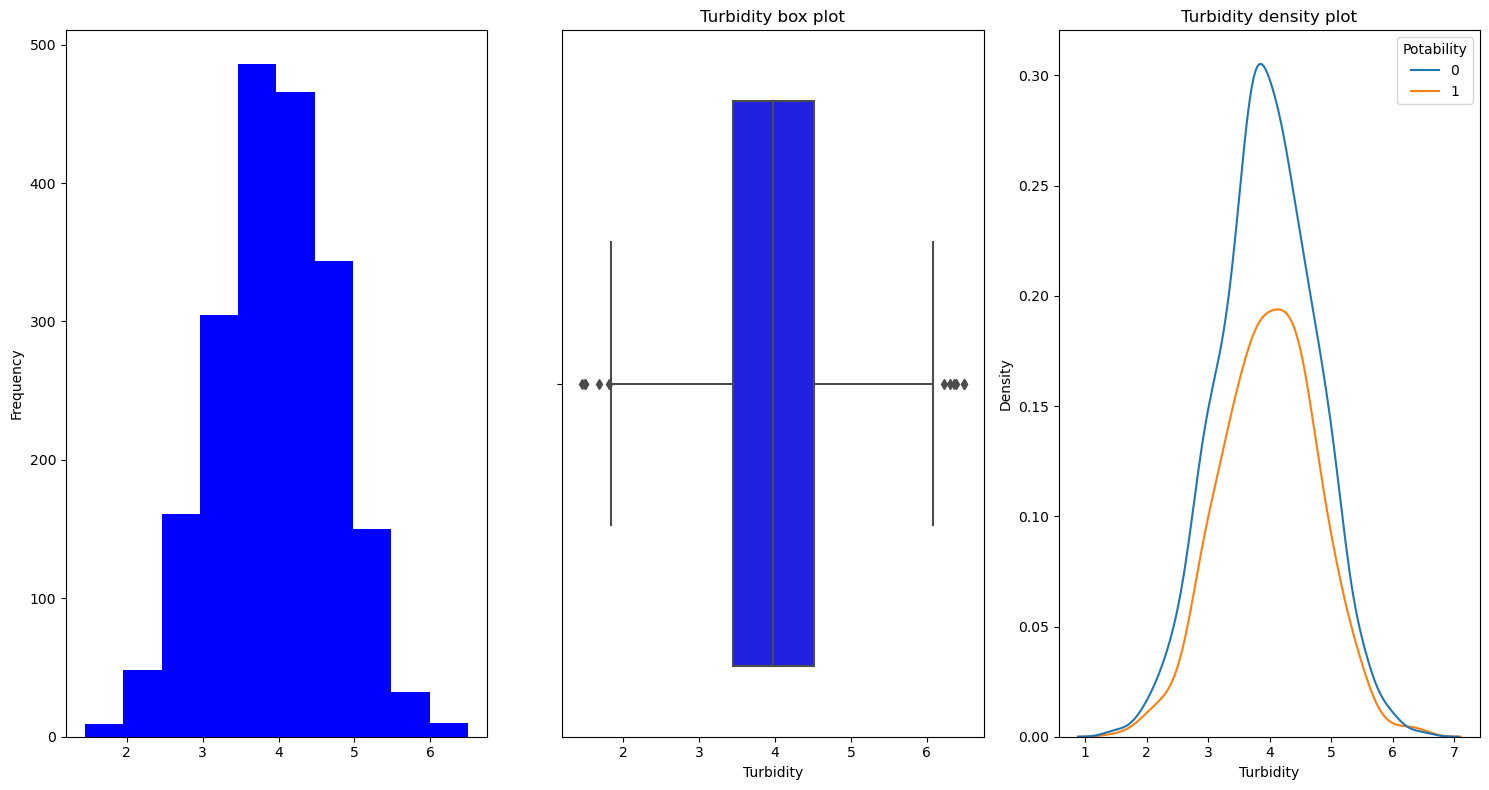

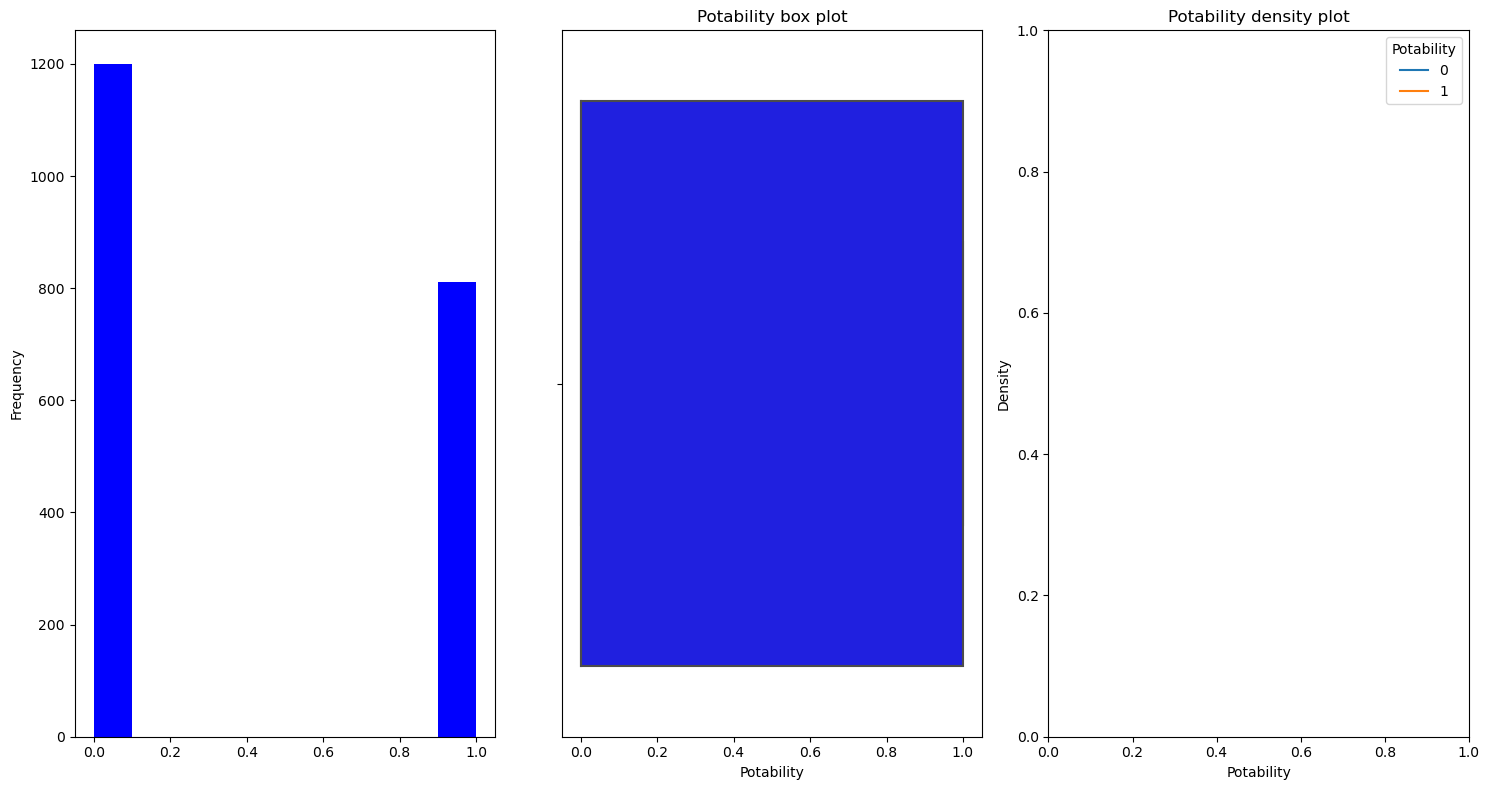

In [11]:
plt.style.use('default')
for i in df.columns:
    feature_viz(i)

C:\Users\user\AppData\Local\Temp\ipykernel_13584\457347953.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\user\AppData\Local\Temp\ipykernel_13584\457347953.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\user\AppData\Local\Temp\ipykernel_13584\457347953.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\user\AppData\Local\Temp\ipykernel_13584\457347953.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\user\AppData\Local\Temp\ipykernel_13584\457347953.py:8: UserWarning: Matplotlib is currently using module://matplot

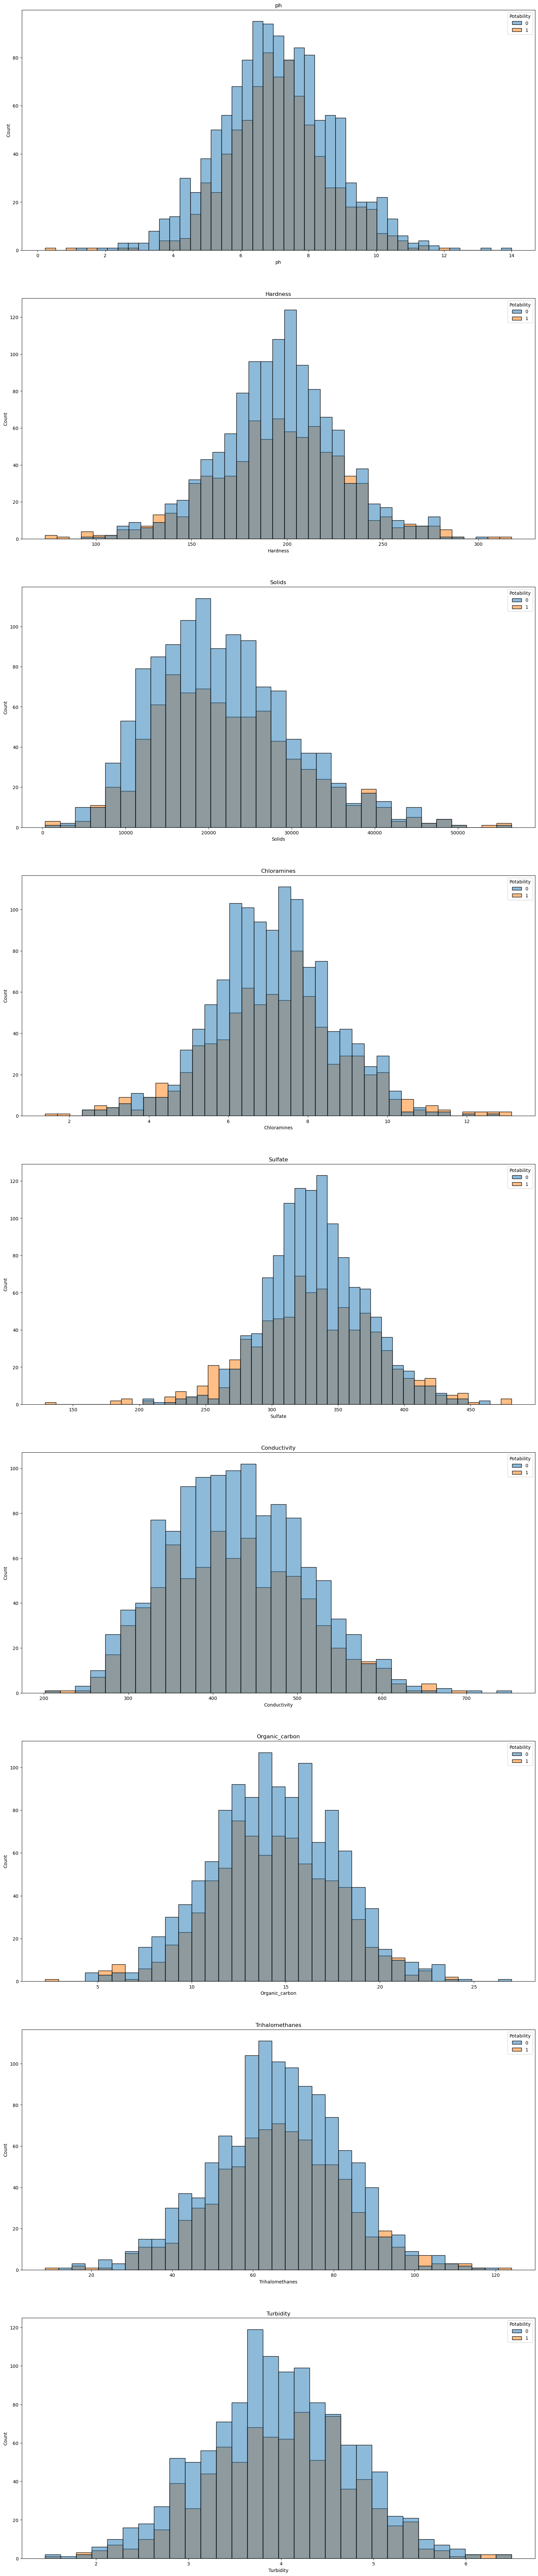

In [12]:
#독립변수 히스토그램
plt.style.use('default')
fig, ax =plt.subplots(9,1,figsize=(20,100))
x=0
for i in range(0, 9):
    sns.histplot(x=df.columns[x], data=df, hue='Potability', ax=ax[i]);
    ax[i].set_title(df.columns[x])
    fig.show()
    x+=1

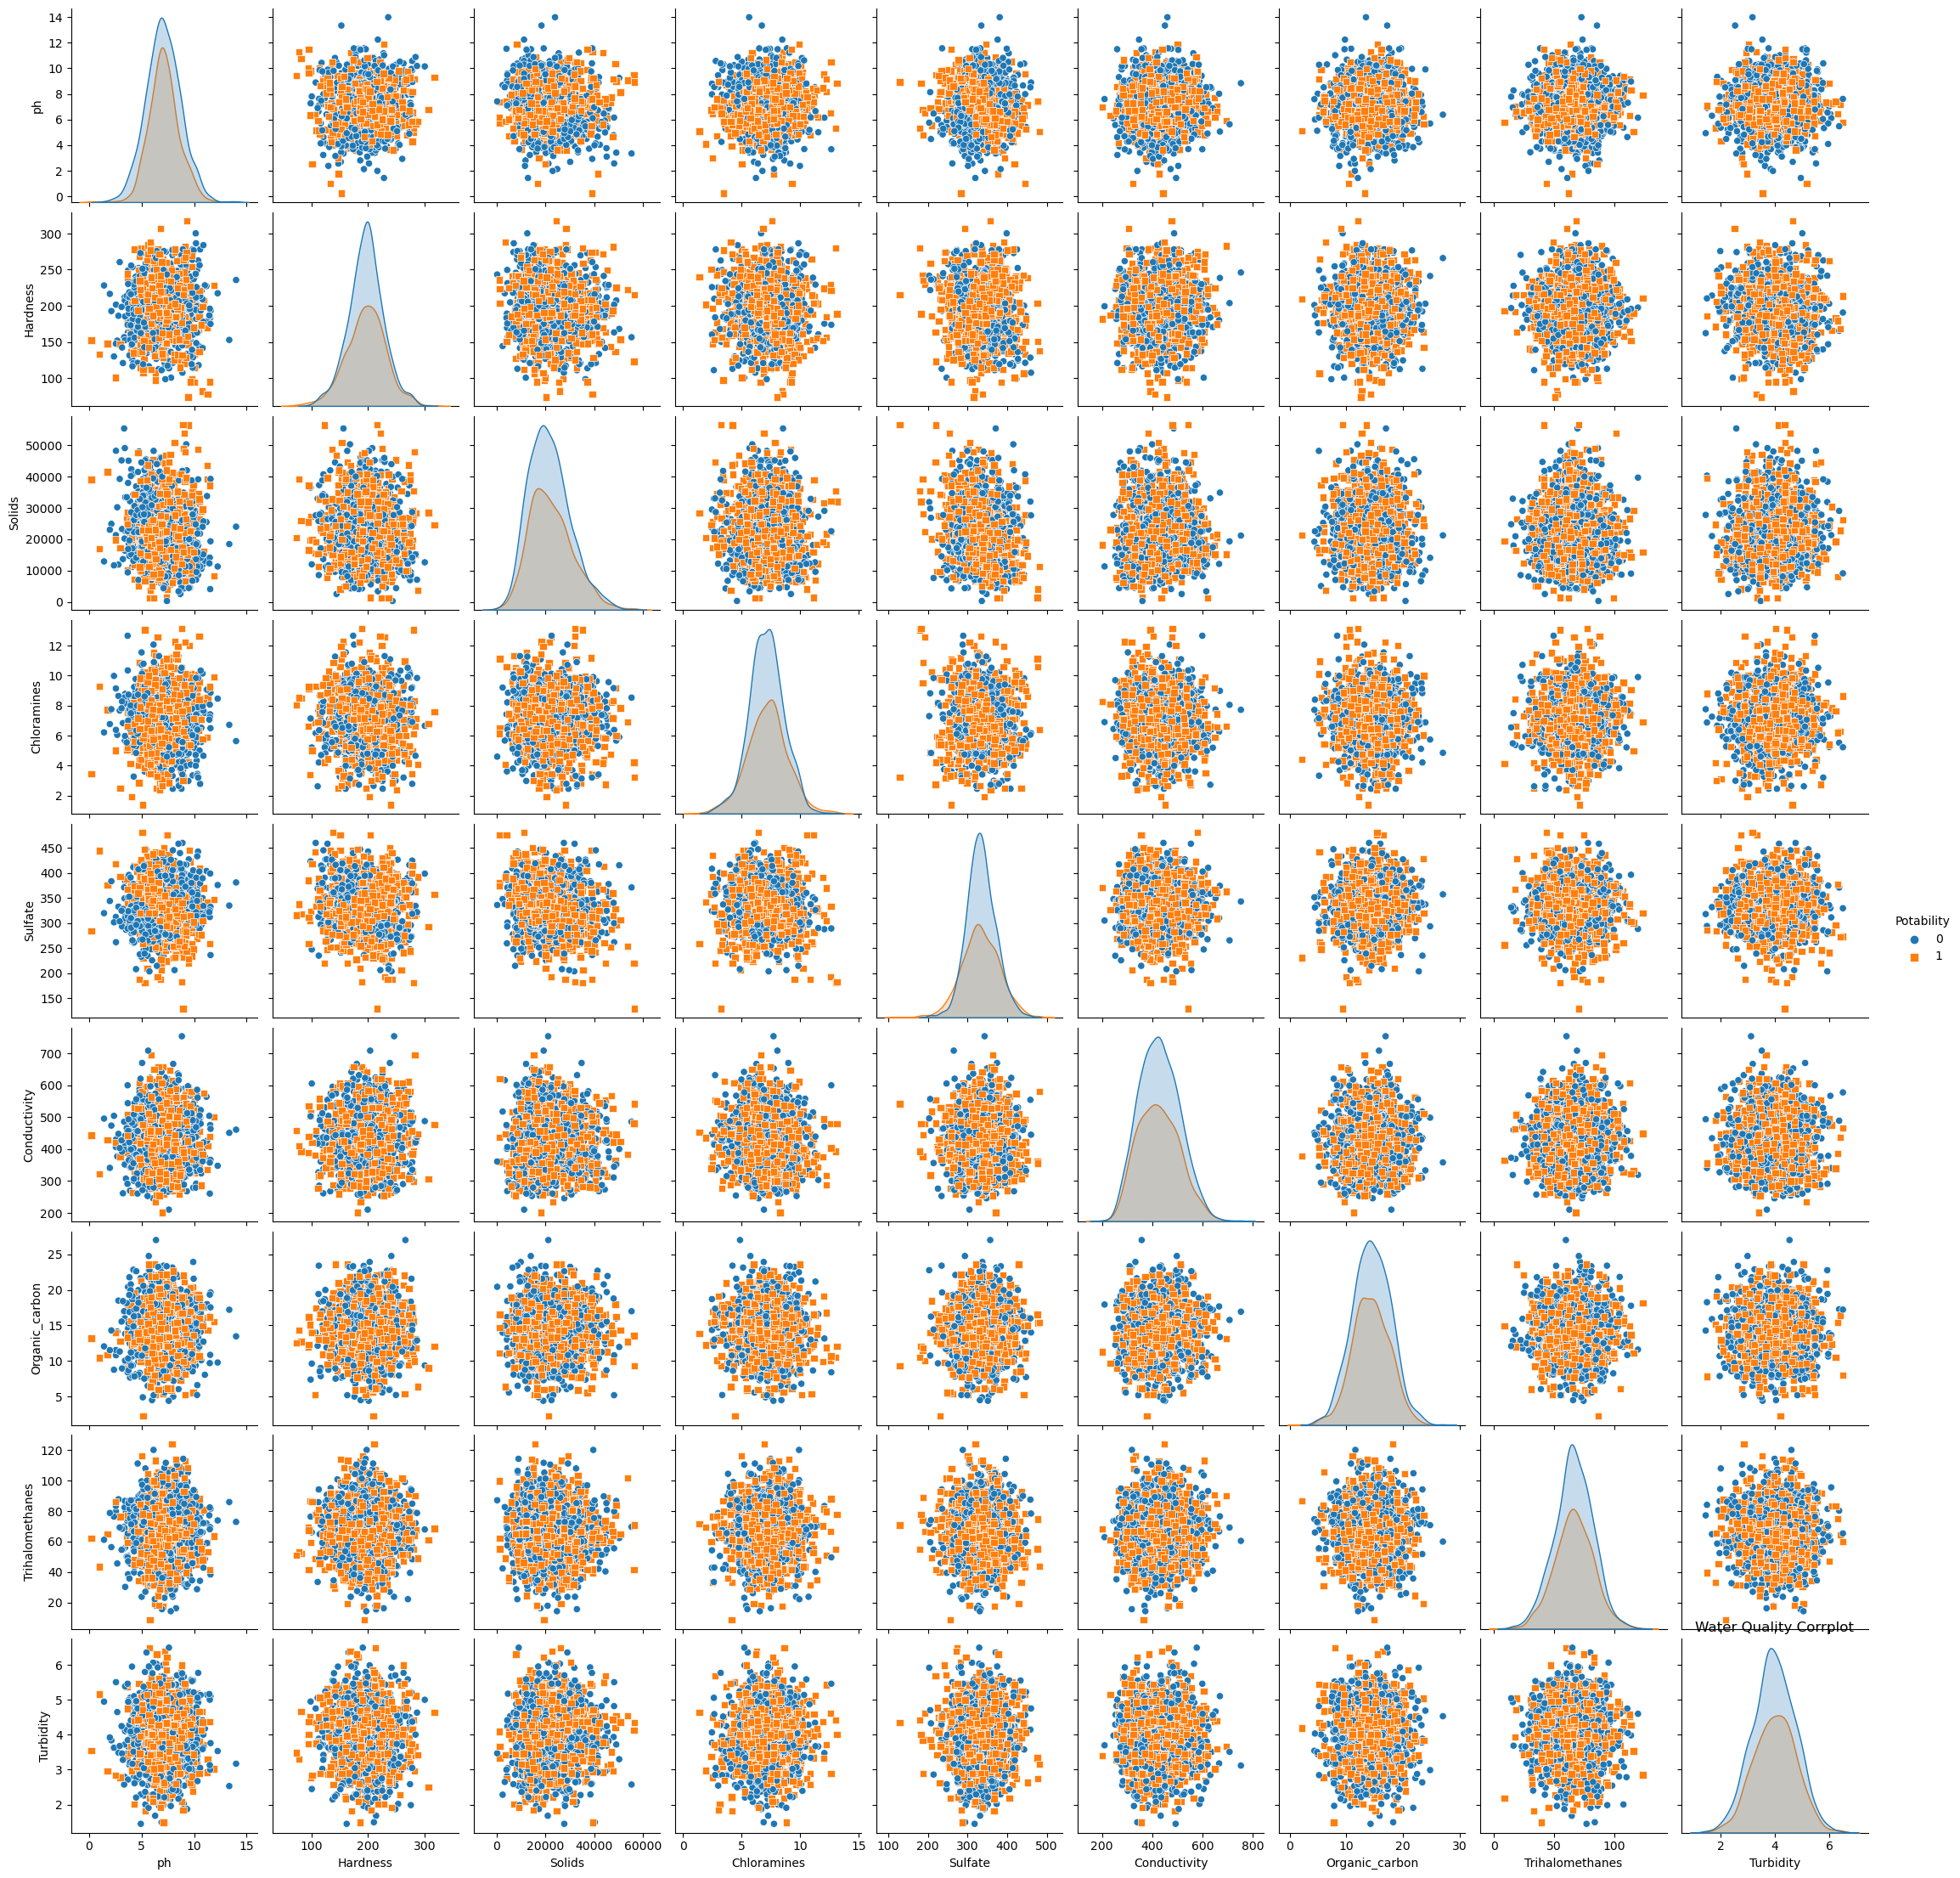

In [13]:
# 산점도 행렬
sns.pairplot(df, hue="Potability", markers=["o", "s"])
plt.title("Water Quality Corrplot")
plt.show()

<AxesSubplot:>

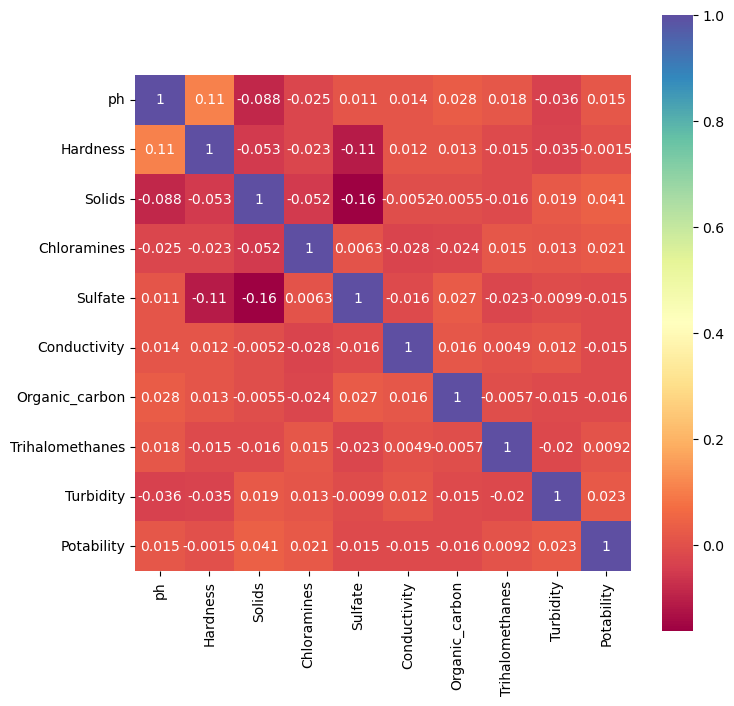

In [14]:
# 상관 행렬
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(), cmap= 'Spectral', annot=True, square=True)

In [15]:
# 독립변수와 종속변수 X, y에 각각 분할
X = df.drop("Potability", axis = 1)
y = df['Potability']

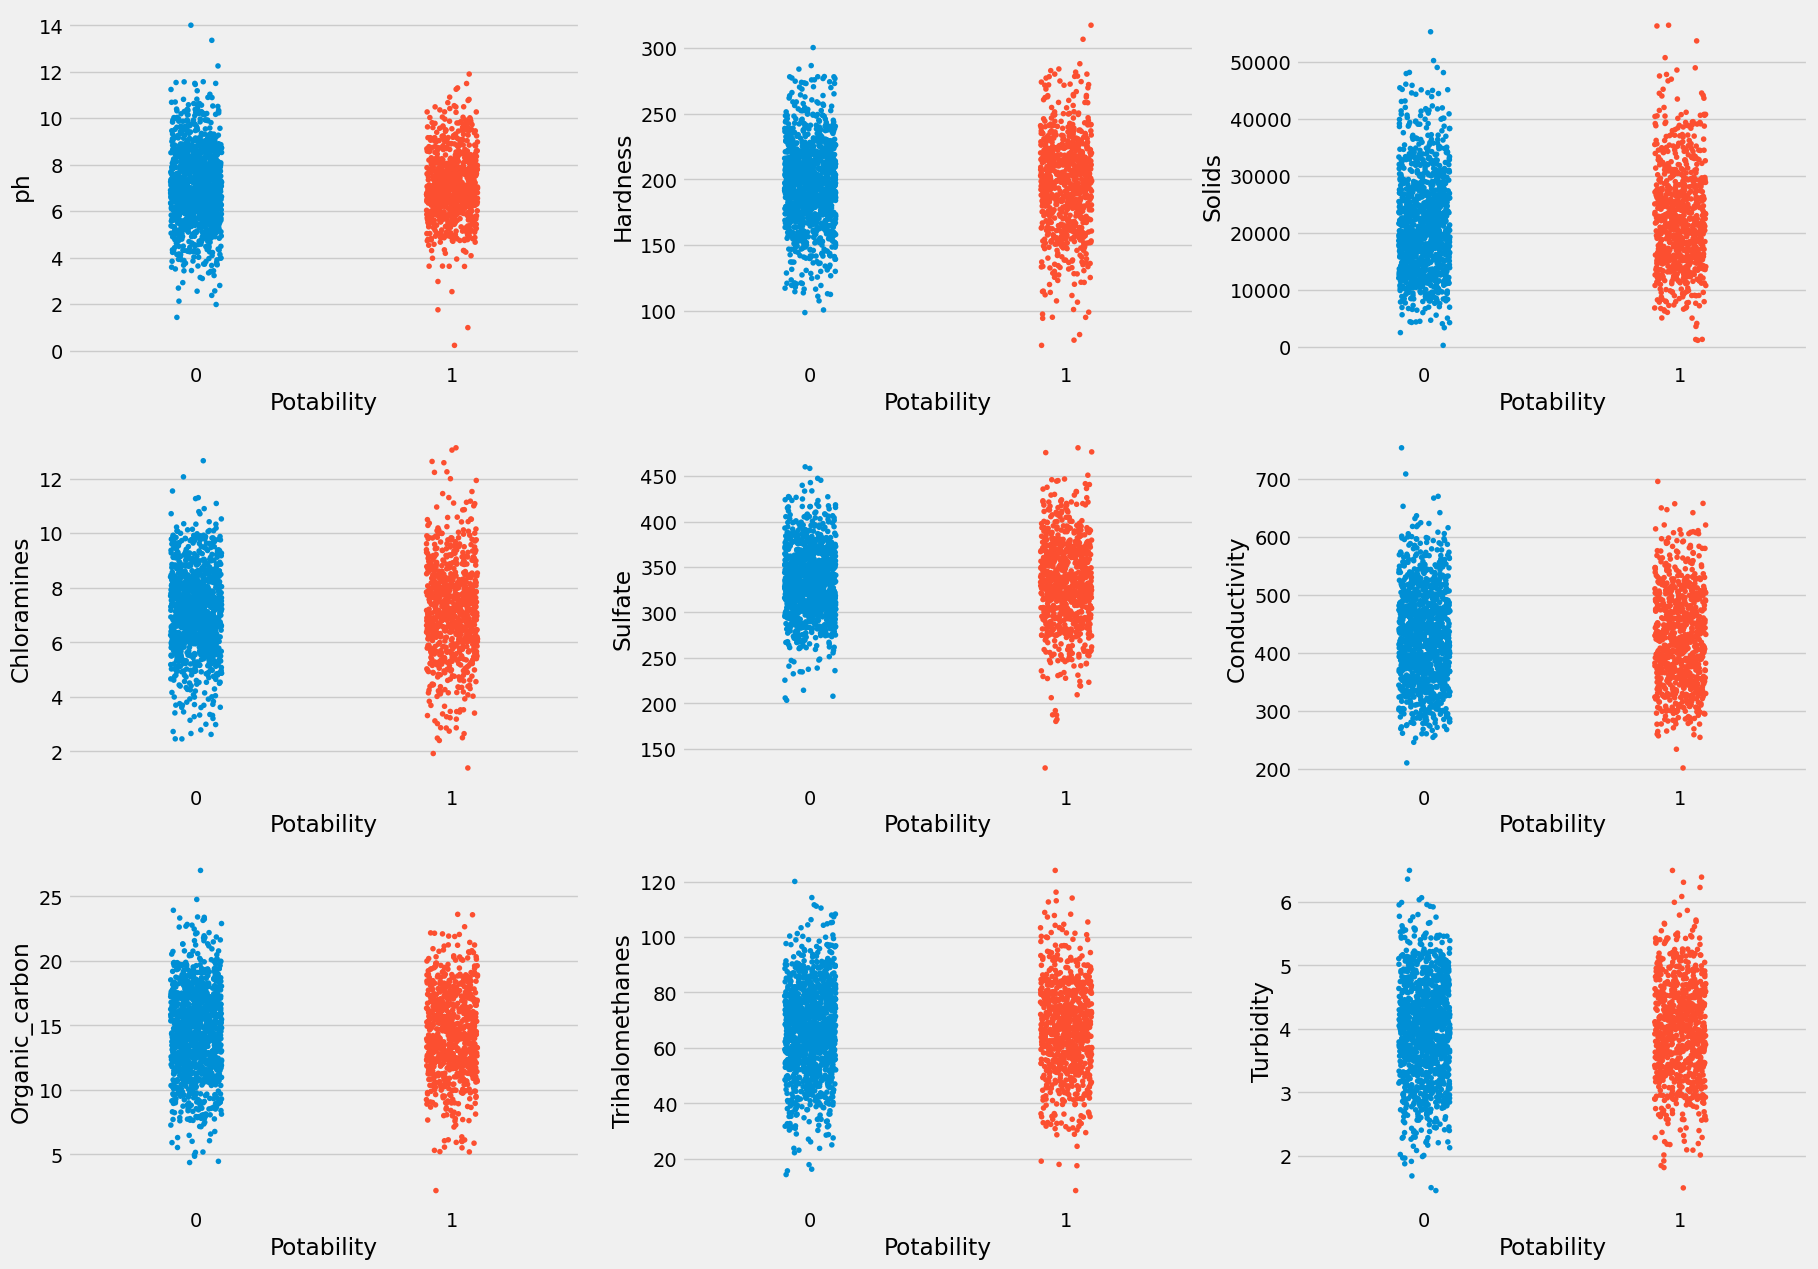

In [16]:
# X에 따른 target의 분포 (strip)
plt.style.use('fivethirtyeight')
plt.figure(figsize = (20, 20))

for n, column in enumerate(X.columns):
    plt.subplot(4, 3, n + 1)
    sns.stripplot(x = y , y = X[column], size = 4)

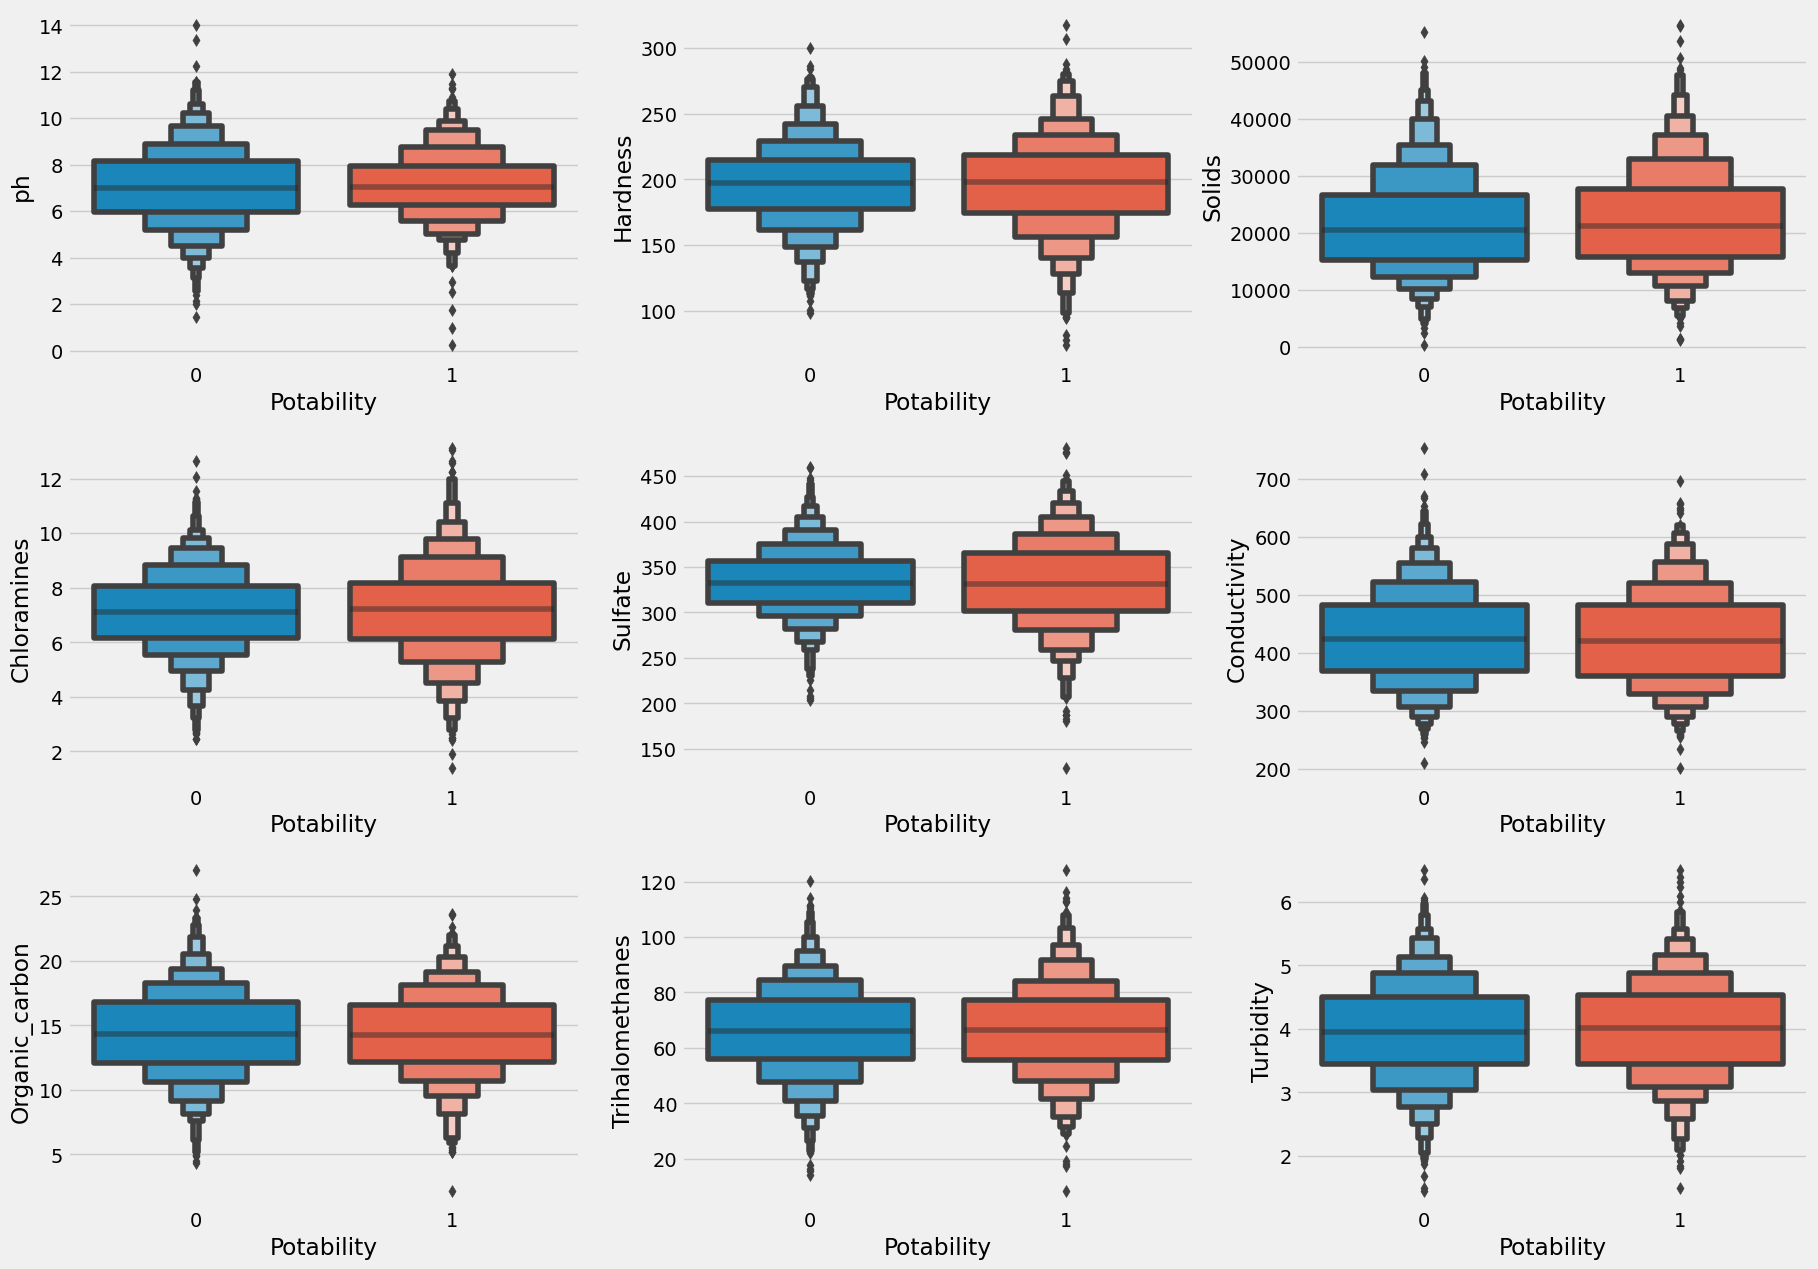

In [17]:
# X에 따른 target의 분포 (Boxen)
plt.figure(figsize = (20, 20))
for n, column in enumerate(X.columns):
    plt.subplot(4, 3, n + 1)
    sns.boxenplot(x = y , y = X[column])

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

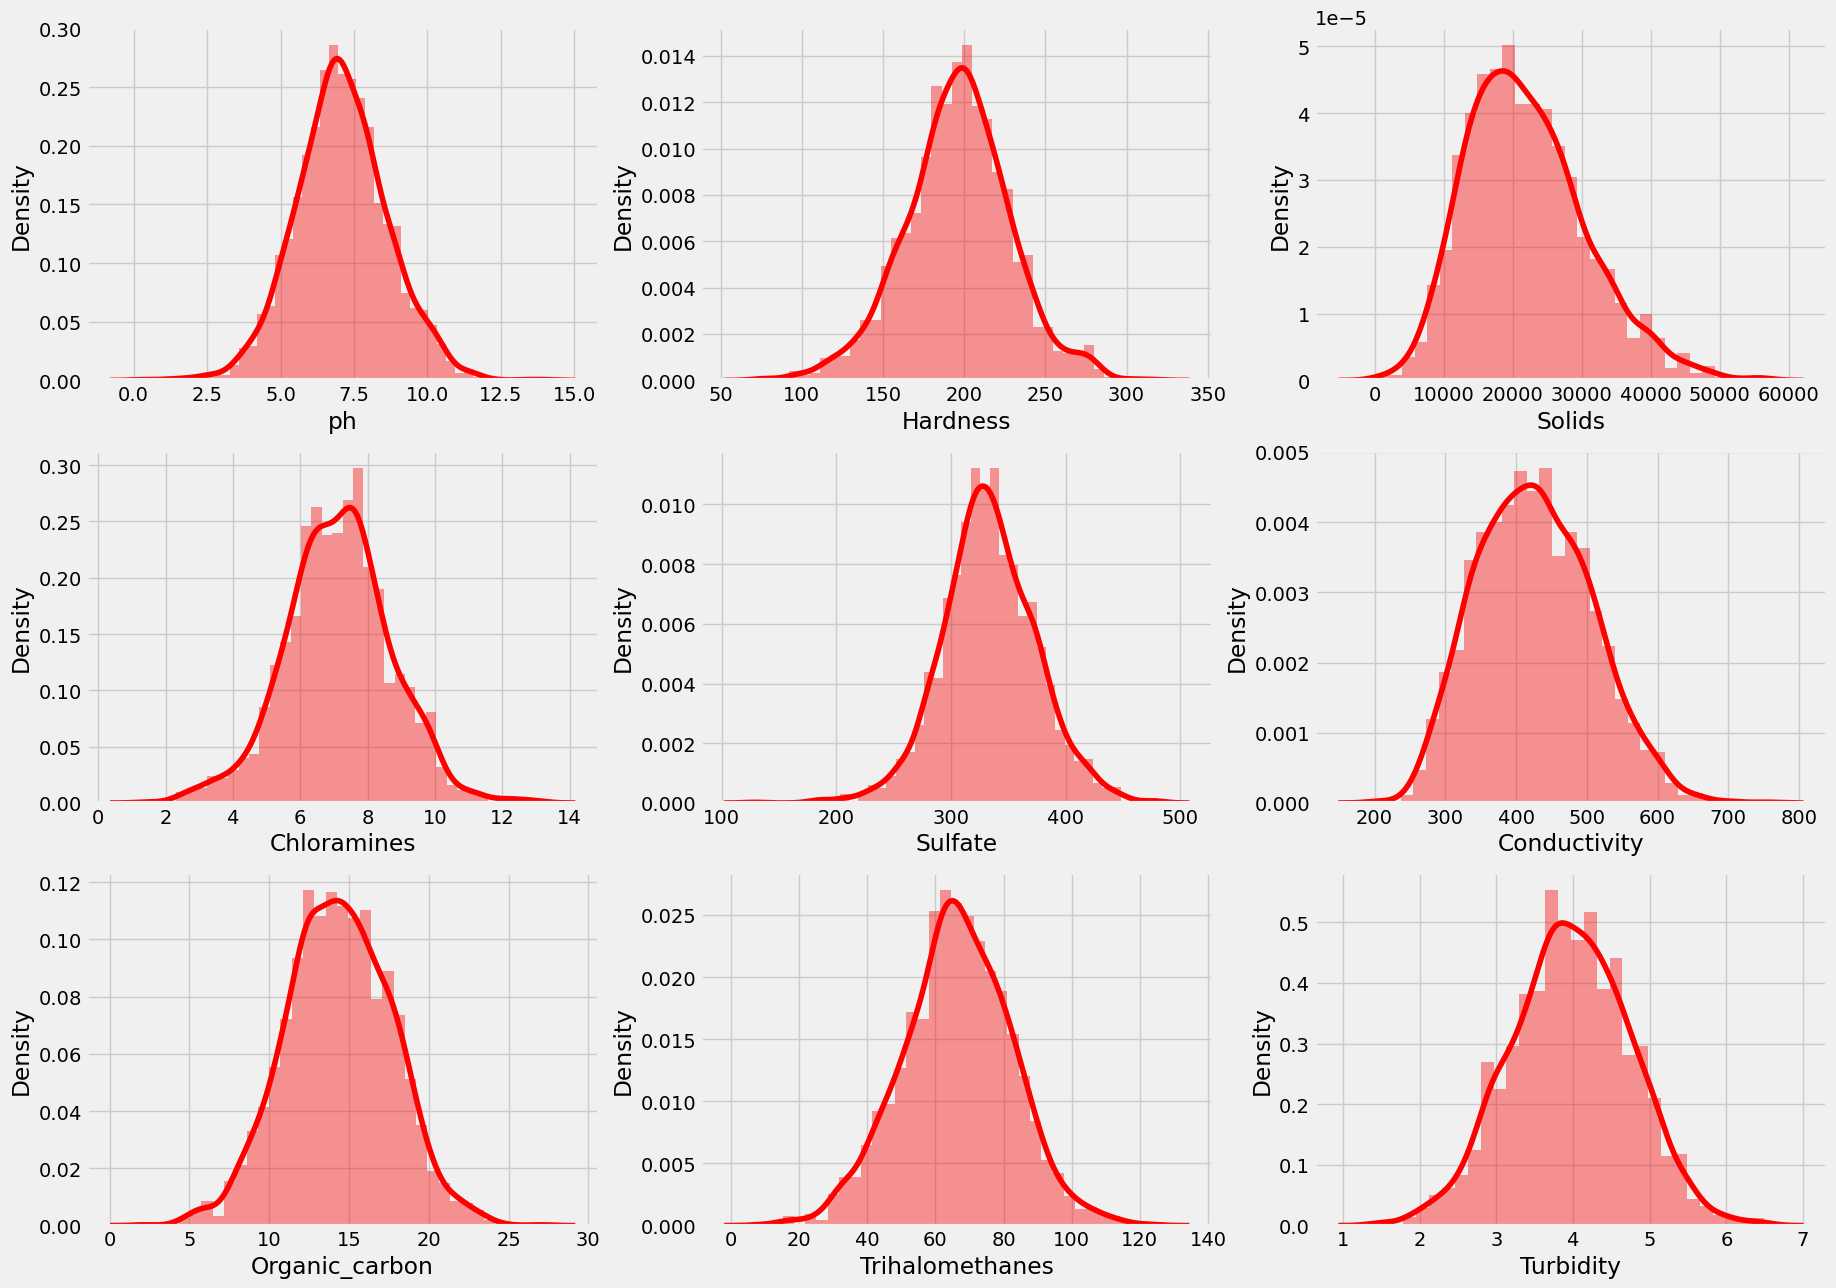

In [18]:
plt.figure(figsize = (20, 20))
for n, column in enumerate(X.columns):
    plt.subplot(4, 3, n + 1)
    sns.distplot(X[column], color = 'r')

In [19]:
# 표준화 전
X

ph    Hardness        Solids  Chloramines     Sulfate  \
3      8.316766  214.373394  22018.417441     8.059332  356.886136   
4      9.092223  181.101509  17978.986339     6.546600  310.135738   
5      5.584087  188.313324  28748.687739     7.544869  326.678363   
6     10.223862  248.071735  28749.716544     7.513408  393.663396   
7      8.635849  203.361523  13672.091764     4.563009  303.309771   
...         ...         ...           ...          ...         ...   
3267   8.989900  215.047358  15921.412018     6.297312  312.931022   
3268   6.702547  207.321086  17246.920347     7.708117  304.510230   
3269  11.491011   94.812545  37188.826022     9.263166  258.930600   
3270   6.069616  186.659040  26138.780191     7.747547  345.700257   
3271   4.668102  193.681735  47580.991603     7.166639  359.948574   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
3       363.266516       18.436524       100.341674   4.628771  
4       398.410813       11.558279        31.997993   4.075075  
5       280.467916        8.399735        54.917862   2.559708  
6       283.651634       13.789695        84.603556   2.672989  
7       474.607645       12.363817        62.798309   4.401425  
...            ...             ...              ...        ...  
3267    390.410231        9.899115        55.069304   4.613843  
3268    329.266002       16.217303        28.878601   3.442983  
3269    439.893618       16.172755        41.558501   4.369264  
3270    415.886955       12.067620        60.419921   3.669712  
3271    526.424171       13.894419        66.687695   4.435821  

[2011 rows x 9 columns]

In [20]:
from sklearn.preprocessing import StandardScaler
st = StandardScaler()
col= X.columns
X[col] = st.fit_transform(X[col])
X[col]

ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
3     0.782466  0.564114  0.011687     0.583804  0.574378     -0.783962   
4     1.275463 -0.455653 -0.455835    -0.370947 -0.560480     -0.348429   
5    -0.954835 -0.234614  0.790645     0.259104 -0.158911     -1.810063   
6     1.994902  1.596951  0.790764     0.239248  1.467140     -1.770608   
7     0.985323  0.226606 -0.954313    -1.622878 -0.726179      0.595858   
...        ...       ...       ...          ...       ...           ...   
3267  1.210411  0.584770 -0.693978    -0.528284 -0.492625     -0.447578   
3268 -0.243774  0.347964 -0.540564     0.362137 -0.697038     -1.205321   
3269  2.800492 -3.100365  1.767503     1.343596 -1.803476      0.165656   
3270 -0.646160 -0.285317  0.488576     0.387023  0.302843     -0.131852   
3271 -1.537172 -0.070075  2.970287     0.020386  0.648718      1.238006   

      Organic_carbon  Trihalomethanes  Turbidity  
3           1.227032         2.111652   0.844761  
4          -0.842154        -2.140399   0.135033  
5          -1.792340        -0.714423  -1.807366  
6          -0.170876         1.132494  -1.662163  
7          -0.599824        -0.224135   0.553348  
...              ...              ...        ...  
3267       -1.341281        -0.705001   0.825626  
3268        0.559422        -2.334474  -0.675183  
3269        0.546021        -1.545585   0.512125  
3270       -0.688929        -0.372108  -0.384562  
3271       -0.139372         0.017846   0.597437  

[2011 rows x 9 columns]

# 오버샘플링

In [21]:
# 업샘플링없이 학습/검증 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)
X_train.shape, y_train.shape

((1608, 9), (1608,))

In [22]:
# 클래스 빈도
y_train.value_counts()

0    960
1    648
Name: Potability, dtype: int64

In [23]:
# test data 클래스 빈도
y_test.value_counts()

0    240
1    163
Name: Potability, dtype: int64

In [24]:
# 업샘플링 전 랜덤 포레스트
from sklearn.ensemble import RandomForestClassifier
import time
start = time.time()
rnd_clf = RandomForestClassifier()
rnd_clf.fit( X_train, y_train ) #학습
rnd_clf_pred = rnd_clf.predict(X_test) #X_test 예측
rnd_clf_acc = rnd_clf.score(X_test, y_test) # 정확도(Accuracy) 출력 
print("랜덤포레스트 training accuracy  :", rnd_clf.score(X_train, y_train)*100, "%")
print("랜덤포레스트 test accuracy :", rnd_clf_acc * 100, "%")
end = time.time() 
print('Execution time is:', end - start) 

랜덤포레스트 training accuracy  : 100.0 %
랜덤포레스트 test accuracy : 66.00496277915633 %
Execution time is: 0.4052248001098633


In [25]:
# SMOTE 오버샘플링
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_up, y_up = oversample.fit_resample(X, y)
print(X_up.shape) # 입력데이터 행열 확인
print(y_up.value_counts()) # 출력데이터 클래스 빈도 확인

(2400, 9)
0    1200
1    1200
Name: Potability, dtype: int64


In [26]:
# 오버샘플링 후 학습/검증 분할
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size = 0.2, stratify=y_up)
print(X_train.shape) # 입력데이터 행열 확인
print(y_train.value_counts()) # 출력데이터 클래스 빈도 확인

(1920, 9)
1    960
0    960
Name: Potability, dtype: int64


In [27]:
# SMOTE 오버샘플링 후 split - modeling
rnd_clf = RandomForestClassifier()
rnd_clf.fit( X_train, y_train ) #학습
rnd_clf_pred = rnd_clf.predict(X_test) #X_test 예측
rnd_clf_acc = rnd_clf.score(X_test, y_test) # 정확도(Accuracy) 출력 
print("랜덤포레스트 training accuracy  :", rnd_clf.score(X_train, y_train)*100, "%")
print("랜덤포레스트 test accuracy :", rnd_clf_acc * 100, "%")

랜덤포레스트 training accuracy  : 100.0 %
랜덤포레스트 test accuracy : 70.83333333333334 %


In [28]:
# ADASYN 오버 샘플링
from imblearn.over_sampling import ADASYN
oversample = ADASYN()
X_up_ada, y_up_ada = oversample.fit_resample(X, y)
print(X_up_ada.shape) 
print(y_up_ada.value_counts())

(2487, 9)
1    1287
0    1200
Name: Potability, dtype: int64


In [29]:
# ADASYN 오버샘플링 후 split - modeling
X_train_ada, X_test_ada, y_train_ada, y_test_ada = train_test_split(X_up_ada, y_up_ada, 
                                                    test_size = 0.2, stratify=y_up_ada)

rnd_clf = RandomForestClassifier()
rnd_clf.fit( X_train_ada, y_train_ada ) #학습
rnd_clf_pred = rnd_clf.predict(X_test_ada) #X_test 예측
rnd_clf_acc = rnd_clf.score(X_test_ada, y_test_ada) # 정확도(Accuracy) 출력 
print("랜덤포레스트 training accuracy  :", rnd_clf.score(X_train_ada, y_train_ada)*100, "%")
print("랜덤포레스트 test accuracy :", rnd_clf_acc * 100, "%")

랜덤포레스트 training accuracy  : 100.0 %
랜덤포레스트 test accuracy : 76.30522088353415 %


In [30]:
#SMOTE 오버샘플링
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_up_smt, y_up_smt = oversample.fit_resample(X, y)
X_train_smt, X_test_smt, y_train_smt, y_test_smt = train_test_split(X_up_smt, y_up_smt, 
                                                                    test_size = 0.2, stratify=y_up_smt)

rnd_clf = RandomForestClassifier()
rnd_clf.fit( X_train_smt , y_train_smt ) #학습
rnd_clf_pred = rnd_clf.predict(X_test_smt) #X_test 예측
rnd_clf_acc = rnd_clf.score(X_test_smt, y_test_smt) # 정확도(Accuracy) 출력 
print("랜덤포레스트 training accuracy  :", rnd_clf.score(X_train_smt, y_train_smt)*100, "%")
print("랜덤포레스트 test accuracy :", rnd_clf_acc * 100, "%")

랜덤포레스트 training accuracy  : 100.0 %
랜덤포레스트 test accuracy : 69.16666666666667 %


In [31]:
# RandomOverSampling
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
X_up_ROS, y_up_ROS = oversample.fit_resample(X, y)
print(X_up_ROS.shape) 
print(y_up_ROS.value_counts())

(2400, 9)
0    1200
1    1200
Name: Potability, dtype: int64


In [32]:
# RandomOverSampler 오버샘플링 후 split - modeling
X_train_ROS, X_test_ROS, y_train_ROS, y_test_ROS = train_test_split(X_up_ROS, y_up_ROS, 
                                                    test_size = 0.2, stratify=y_up_ROS)

from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier()
rnd_clf.fit( X_train_ROS, y_train_ROS ) #학습
rnd_clf_pred = rnd_clf.predict(X_test_ROS) #X_test 예측
rnd_clf_acc = rnd_clf.score(X_test_ROS, y_test_ROS) # 정확도(Accuracy) 출력 
print("랜덤포레스트 training accuracy  :", rnd_clf.score(X_train_ROS, y_train_ROS)*100, "%")
print("랜덤포레스트 test accuracy :", rnd_clf_acc * 100, "%")

랜덤포레스트 training accuracy  : 100.0 %
랜덤포레스트 test accuracy : 75.20833333333333 %


# 분류모델링

In [52]:
from sklearn.model_selection import GridSearchCV
start = time.time()
rnd_clf = RandomForestClassifier()
param_grid = { 'n_estimators':[100,200, 350, 500],
               'min_samples_leaf':[2, 10, 30]}

gscv_rnd = GridSearchCV(rnd_clf, param_grid,cv=5)
gscv_rnd.fit(X_train_ROS, y_train_ROS)
print("랜덤포레스트 최적 점수 : {}".format(gscv_rnd.best_score_))
print("랜덤포레스트 최적 파라미터 : {}".format(gscv_rnd.best_params_))

print(gscv_rnd.best_estimator_)
end = time.time() 
print('Execution time is:') 
print(end - start)

랜덤포레스트 최적 점수 : 0.7385416666666667
랜덤포레스트 최적 파라미터 : {'min_samples_leaf': 2, 'n_estimators': 500}
RandomForestClassifier(min_samples_leaf=2, n_estimators=500)
Execution time is:
46.065226316452026


랜덤포레스트 training accuracy  : 99.84375 %
랜덤포레스트 test accuracy : 77.29166666666667 %
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       240
           1       0.78      0.76      0.77       240

    accuracy                           0.77       480
   macro avg       0.77      0.77      0.77       480
weighted avg       0.77      0.77      0.77       480

--------------------------------------------------------------------------
[[188  52]
 [ 57 183]]
--------------------------------------------------------------------------
Execution time is:
1.5851857662200928


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, '<< Random Forest >>')

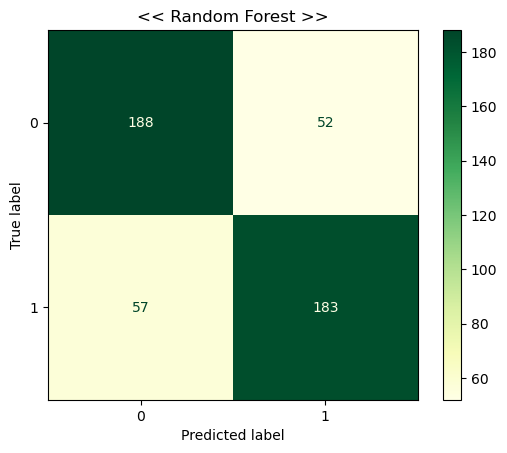

In [51]:
plt.style.use('default')
start = time.time()
rnd_clf = RandomForestClassifier(min_samples_leaf=2, n_estimators=350, random_state=42)
rnd_clf.fit( X_train_ROS, y_train_ROS ) #학습
rnd_clf_pred = rnd_clf.predict(X_test_ROS) #X_test 예측
rnd_clf_acc = rnd_clf.score(X_test_ROS, y_test_ROS) # 정확도(Accuracy) 출력 
print("랜덤포레스트 training accuracy  :", rnd_clf.score(X_train_ROS, y_train_ROS)*100, "%")
print("랜덤포레스트 test accuracy :", rnd_clf_acc * 100, "%")
print("--------------------------------------------------------------------------")
print(classification_report(y_test_ROS, rnd_clf_pred))
print("--------------------------------------------------------------------------")
print(confusion_matrix(y_test_ROS, rnd_clf_pred))
print("--------------------------------------------------------------------------")
end = time.time() 
print('Execution time is:') 
print(end - start)
plot_confusion_matrix(rnd_clf, X_test_ROS, y_test_ROS, cmap='YlGn')
plt.title("<< Random Forest >>")

In [35]:
# 변수 중요도 Series 생성 후 sorting
forest_importances = pd.Series(rnd_clf.feature_importances_)
feature_scores = pd.Series(rnd_clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

Sulfate            0.155135
ph                 0.154704
Solids             0.109158
Chloramines        0.108959
Hardness           0.108681
Turbidity          0.093570
Trihalomethanes    0.091193
Organic_carbon     0.091027
Conductivity       0.087574
dtype: float64

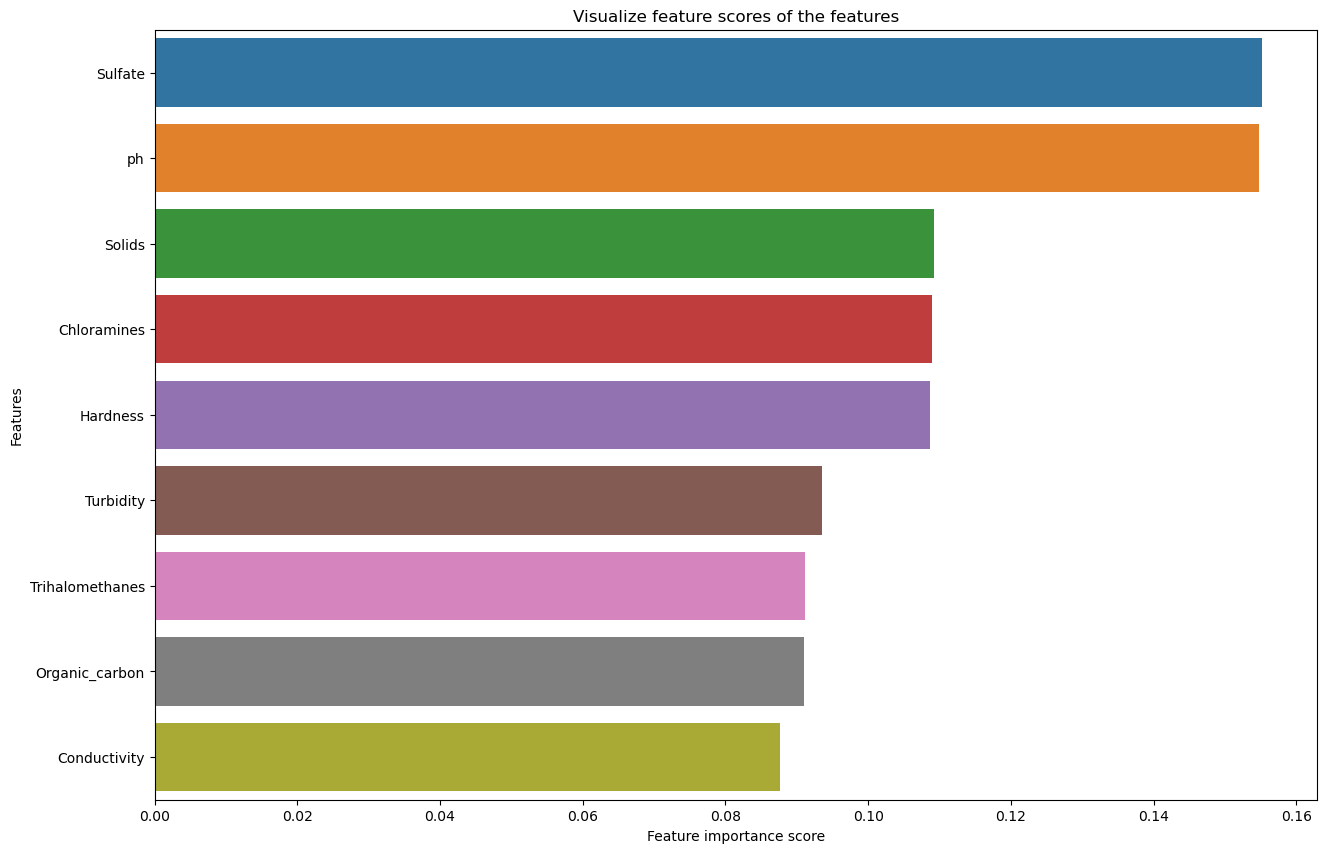

In [36]:
# 변수 중요도 seaborn bar plot
f, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(x=feature_scores, y=feature_scores.index)
ax.set_title("Visualize feature scores of the features")
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [37]:
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LogisticRegression
import numpy as np

lr = LogisticRegression( random_state = 0 )

params = {'C' : [0.1, 1, 3, 5, 10],
          'max_iter' : [10, 100, 1000],
          "penalty":["l1","l2"]
          }
lr_grid_cv = GridSearchCV(lr, param_grid=params, cv=3, scoring='accuracy', verbose=1)

In [38]:
import time
start = time.time()
#----------------------------------------------
lr_grid_cv.fit( X_test_ROS , y_test_ROS)
print("로지스틱 최적 점수 : {}".format(lr_grid_cv.best_score_))
print("로지스틱 최적 파라미터 : {}".format(lr_grid_cv.best_params_))
print(lr_grid_cv.best_estimator_)
#----------------------------------------------
end = time.time() 
print("--------------------------------------------------------------------------")
print('Execution time is:') 
print(end - start)

Fitting 3 folds for each of 30 candidates, totalling 90 fits
로지스틱 최적 점수 : 0.4916666666666667
로지스틱 최적 파라미터 : {'C': 0.1, 'max_iter': 10, 'penalty': 'l2'}
LogisticRegression(C=0.1, max_iter=10, random_state=0)
--------------------------------------------------------------------------
Execution time is:
0.21210980415344238


C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
45 fits failed out of a total of 90.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
45 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 61, in _check_solver
    raise ValueError(
ValueErro

로지스틱 회귀 training accuracy : 53.90625 %
로지스틱 회귀 testing accuracy : 48.95833333333333 %
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.49      0.48      0.48       240
           1       0.49      0.50      0.49       240

    accuracy                           0.49       480
   macro avg       0.49      0.49      0.49       480
weighted avg       0.49      0.49      0.49       480

--------------------------------------------------------------------------
[[115 125]
 [120 120]]
--------------------------------------------------------------------------
로지스틱 회귀 수행시간 :
0.015355348587036133


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


<Figure size 2000x2000 with 0 Axes>

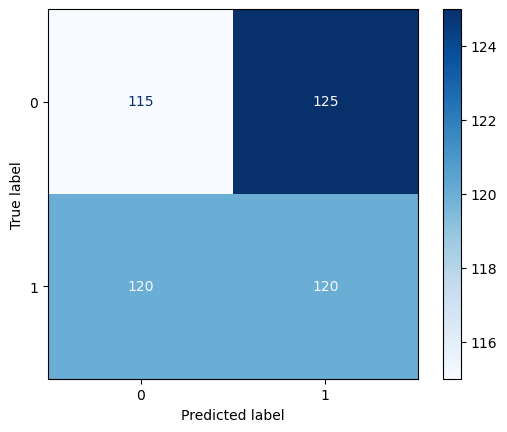

In [39]:
from sklearn.linear_model import LogisticRegression
### 로지스틱 회귀 ###
start = time.time()
#----------------------------------------------
lr = LogisticRegression(C=3, max_iter=1000, random_state=0)
lr.fit( X_train_ROS, y_train_ROS )
lr_pred = lr.predict( X_test_ROS )
lr_acc = lr.score( X_test_ROS, y_test_ROS )
#----------------------------------------------
print("로지스틱 회귀 training accuracy :", lr.score( X_train_ROS, y_train_ROS )*100, "%")
print("로지스틱 회귀 testing accuracy :", lr_acc * 100, "%")
print("--------------------------------------------------------------------------")
print(classification_report( y_test_ROS, lr_pred ))
print("--------------------------------------------------------------------------")
print(confusion_matrix( y_test_ROS, lr_pred ))
print("--------------------------------------------------------------------------")
#----------------------------------------------
end = time.time() 
print('로지스틱 회귀 수행시간 :') 
print(end - start)
plt.figure(figsize=(20, 20))
plot_confusion_matrix(lr , X_test_ROS , y_test_ROS , cmap='Blues')

[1]	valid_0's binary_logloss: 0.682741
[2]	valid_0's binary_logloss: 0.669322
[3]	valid_0's binary_logloss: 0.661022
[4]	valid_0's binary_logloss: 0.652704
[5]	valid_0's binary_logloss: 0.645762
[6]	valid_0's binary_logloss: 0.636746
[7]	valid_0's binary_logloss: 0.632022
[8]	valid_0's binary_logloss: 0.624377
[9]	valid_0's binary_logloss: 0.620627
[10]	valid_0's binary_logloss: 0.614493
[11]	valid_0's binary_logloss: 0.610548
[12]	valid_0's binary_logloss: 0.608191
[13]	valid_0's binary_logloss: 0.605477
[14]	valid_0's binary_logloss: 0.606348
[15]	valid_0's binary_logloss: 0.602952
[16]	valid_0's binary_logloss: 0.599908
[17]	valid_0's binary_logloss: 0.597154
[18]	valid_0's binary_logloss: 0.595521
[19]	valid_0's binary_logloss: 0.590841
[20]	valid_0's binary_logloss: 0.587918
[21]	valid_0's binary_logloss: 0.58744
[22]	valid_0's binary_logloss: 0.58644
[23]	valid_0's binary_logloss: 0.582316


C:\Users\user\anaconda3\lib\site-packages\lightgbm\sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[24]	valid_0's binary_logloss: 0.58268
[25]	valid_0's binary_logloss: 0.58043
[26]	valid_0's binary_logloss: 0.581481
[27]	valid_0's binary_logloss: 0.579548
[28]	valid_0's binary_logloss: 0.576506
[29]	valid_0's binary_logloss: 0.57443
[30]	valid_0's binary_logloss: 0.574075
[31]	valid_0's binary_logloss: 0.573883
[32]	valid_0's binary_logloss: 0.573754
[33]	valid_0's binary_logloss: 0.573481
[34]	valid_0's binary_logloss: 0.571917
[35]	valid_0's binary_logloss: 0.570223
[36]	valid_0's binary_logloss: 0.570526
[37]	valid_0's binary_logloss: 0.570831
[38]	valid_0's binary_logloss: 0.569331
[39]	valid_0's binary_logloss: 0.567162
[40]	valid_0's binary_logloss: 0.565897
[41]	valid_0's binary_logloss: 0.566288
[42]	valid_0's binary_logloss: 0.562715
[43]	valid_0's binary_logloss: 0.560992
[44]	valid_0's binary_logloss: 0.559904
[45]	valid_0's binary_logloss: 0.558441
[46]	valid_0's binary_logloss: 0.55811
[47]	valid_0's binary_logloss: 0.556436
[48]	valid_0's binary_logloss: 0.557318
[49]

[310]	valid_0's binary_logloss: 0.641161
[311]	valid_0's binary_logloss: 0.642872
[312]	valid_0's binary_logloss: 0.643301
[313]	valid_0's binary_logloss: 0.64331
[314]	valid_0's binary_logloss: 0.643168
[315]	valid_0's binary_logloss: 0.64482
[316]	valid_0's binary_logloss: 0.645754
[317]	valid_0's binary_logloss: 0.646718
[318]	valid_0's binary_logloss: 0.646568
[319]	valid_0's binary_logloss: 0.648878
[320]	valid_0's binary_logloss: 0.650019
[321]	valid_0's binary_logloss: 0.651916
[322]	valid_0's binary_logloss: 0.653073
[323]	valid_0's binary_logloss: 0.652862
[324]	valid_0's binary_logloss: 0.653151
[325]	valid_0's binary_logloss: 0.653774
[326]	valid_0's binary_logloss: 0.655069
[327]	valid_0's binary_logloss: 0.654759
[328]	valid_0's binary_logloss: 0.656267
[329]	valid_0's binary_logloss: 0.657163
[330]	valid_0's binary_logloss: 0.656981
[331]	valid_0's binary_logloss: 0.656938
[332]	valid_0's binary_logloss: 0.658826
[333]	valid_0's binary_logloss: 0.659144
[334]	valid_0's bi

[624]	valid_0's binary_logloss: 0.887414
[625]	valid_0's binary_logloss: 0.888873
[626]	valid_0's binary_logloss: 0.889231
[627]	valid_0's binary_logloss: 0.888929
[628]	valid_0's binary_logloss: 0.889748
[629]	valid_0's binary_logloss: 0.890099
[630]	valid_0's binary_logloss: 0.891558
[631]	valid_0's binary_logloss: 0.8926
[632]	valid_0's binary_logloss: 0.893687
[633]	valid_0's binary_logloss: 0.895543
[634]	valid_0's binary_logloss: 0.896529
[635]	valid_0's binary_logloss: 0.897313
[636]	valid_0's binary_logloss: 0.897776
[637]	valid_0's binary_logloss: 0.898079
[638]	valid_0's binary_logloss: 0.898438
[639]	valid_0's binary_logloss: 0.899708
[640]	valid_0's binary_logloss: 0.901337
[641]	valid_0's binary_logloss: 0.903489
[642]	valid_0's binary_logloss: 0.903883
[643]	valid_0's binary_logloss: 0.904388
[644]	valid_0's binary_logloss: 0.904711
[645]	valid_0's binary_logloss: 0.90549
[646]	valid_0's binary_logloss: 0.906546
[647]	valid_0's binary_logloss: 0.908583
[648]	valid_0's bin

[928]	valid_0's binary_logloss: 1.1779
[929]	valid_0's binary_logloss: 1.17782
[930]	valid_0's binary_logloss: 1.17894
[931]	valid_0's binary_logloss: 1.18012
[932]	valid_0's binary_logloss: 1.18019
[933]	valid_0's binary_logloss: 1.18121
[934]	valid_0's binary_logloss: 1.18342
[935]	valid_0's binary_logloss: 1.18418
[936]	valid_0's binary_logloss: 1.18422
[937]	valid_0's binary_logloss: 1.18529
[938]	valid_0's binary_logloss: 1.18497
[939]	valid_0's binary_logloss: 1.18536
[940]	valid_0's binary_logloss: 1.18603
[941]	valid_0's binary_logloss: 1.18709
[942]	valid_0's binary_logloss: 1.18777
[943]	valid_0's binary_logloss: 1.18982
[944]	valid_0's binary_logloss: 1.19146
[945]	valid_0's binary_logloss: 1.19259
[946]	valid_0's binary_logloss: 1.19272
[947]	valid_0's binary_logloss: 1.19464
[948]	valid_0's binary_logloss: 1.19428
[949]	valid_0's binary_logloss: 1.19622
[950]	valid_0's binary_logloss: 1.19779
[951]	valid_0's binary_logloss: 1.19845
[952]	valid_0's binary_logloss: 1.19959
[

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, '<< Light GBM >>')

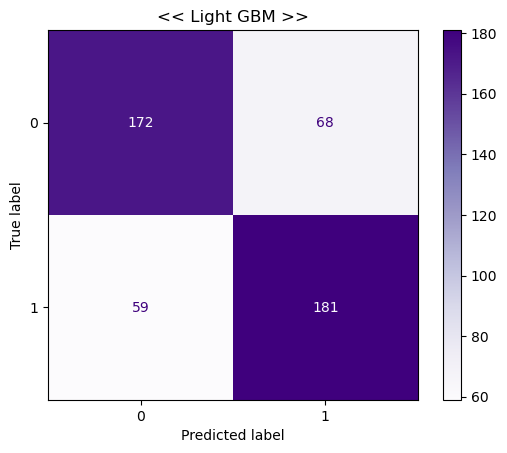

In [40]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=1000)

# 조기 중단 기능에 필요한 파라미터 정의
evals = [(X_test_ROS, y_test_ROS)]
lgbm.fit(X_train_ROS, y_train_ROS, eval_metric='logloss', eval_set=evals, verbose=True)
lgbm_pred = lgbm.predict(X_test_ROS)
pred_proba = lgbm.predict_proba(X_test_ROS)[:,1]
lgbm_acc = lgbm.score(X_test_ROS, y_test_ROS)
print("Light GBM training accuracy :", lgbm.score(X_train_ROS, y_train_ROS)*100, "%")
print("Light GBM testing accuracy :", lgbm_acc * 100, "%")
print("--------------------------------------------------------------------------")
print(classification_report(y_test_ROS, lgbm_pred))
print("--------------------------------------------------------------------------")
print(confusion_matrix(y_test_ROS, lgbm_pred))
print("--------------------------------------------------------------------------")
plot_confusion_matrix(lgbm, X_test_ROS, y_test_ROS, cmap='Purples')
end = time.time() 
print("--------------------------------------------------------------------------")
print('Execution time is:') 
print(end - start)
plt.title("<< Light GBM >>")

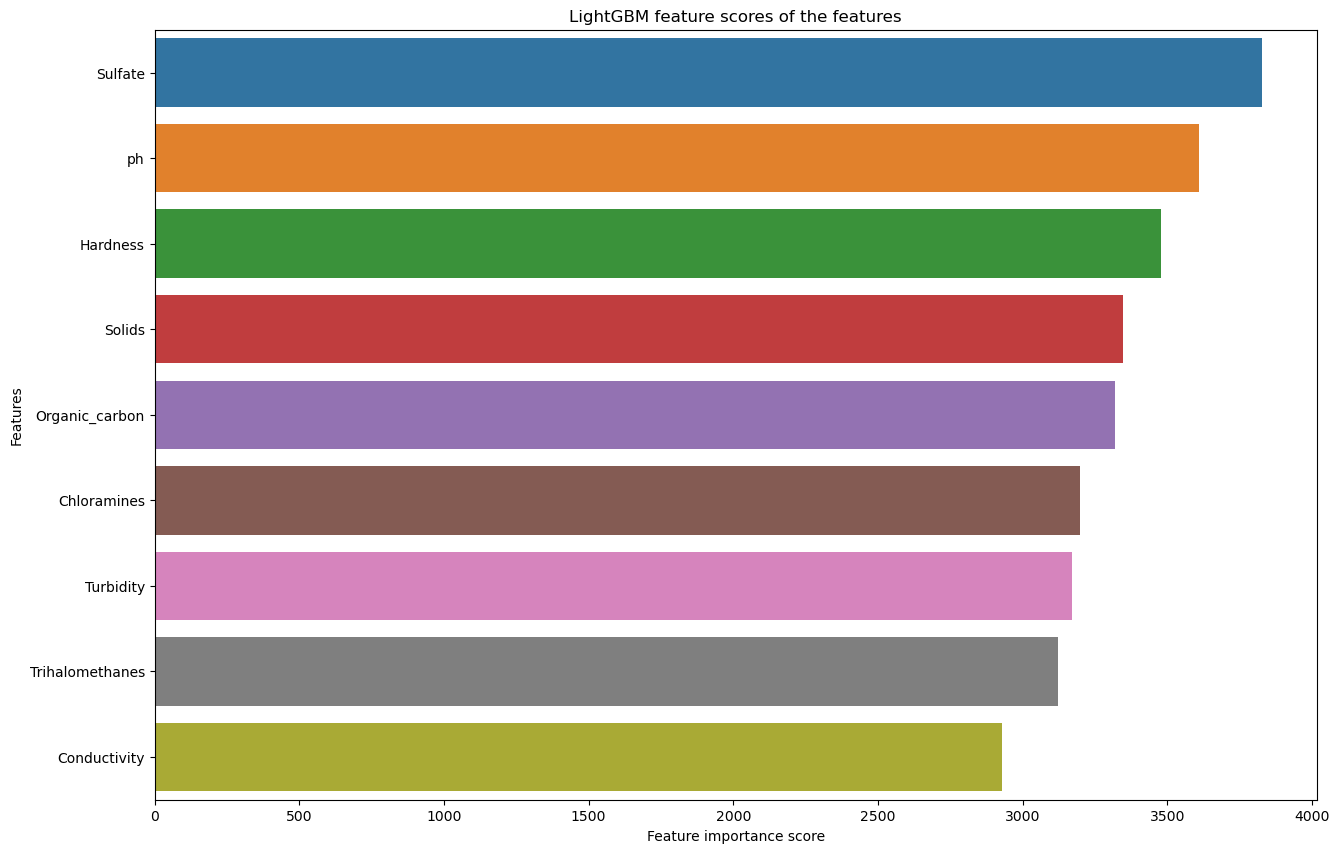

In [41]:
lgbm.feature_importances_
lgbm_feature_scores = pd.Series(lgbm.feature_importances_, index=X_train.columns).sort_values(ascending=False)
# Creating a seaborn bar plot

f, ax = plt.subplots(figsize=(15, 10))
ax = sns.barplot(x=lgbm_feature_scores, y=lgbm_feature_scores.index)
ax.set_title("LightGBM feature scores of the features")
ax.set_xlabel("Feature importance score")
ax.set_ylabel("Features")
plt.show()

In [42]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
start = time.time()
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 10, 30, 50, 70],
              'kernel': ['rbf']}
 
grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)
 
# fitting the model for grid search
grid.fit(X_train_ROS, y_train_ROS)
end = time.time() 
print('Execution time is:', end - start) 

print("SVM 최적 점수 : {}".format(grid.best_score_))
print("SVM 최적 파라미터 : {}".format(grid.best_params_))
print(grid.best_estimator_)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.661 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.680 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.677 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.661 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.719 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.536 total time=   0.0s
[CV 2/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.549 total time=   0.0s
[CV 3/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.542 total time=   0.0s
[CV 4/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.539 total time=   0.0s
[CV 5/5] END .......C=0.1, gamma=10, kernel=rbf;, score=0.539 total time=   0.0s
[CV 1/5] END .......C=0.1, gamma=30, kernel=rbf;, score=0.536 total time=   0.1s
[CV 2/5] END .......C=0.1, gamma=30, kernel=rbf

[CV 2/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.711 total time=   0.0s
[CV 3/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.698 total time=   0.0s
[CV 4/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.674 total time=   0.0s
[CV 5/5] END .......C=1000, gamma=1, kernel=rbf;, score=0.716 total time=   0.0s
[CV 1/5] END ......C=1000, gamma=10, kernel=rbf;, score=0.698 total time=   0.0s
[CV 2/5] END ......C=1000, gamma=10, kernel=rbf;, score=0.711 total time=   0.0s
[CV 3/5] END ......C=1000, gamma=10, kernel=rbf;, score=0.703 total time=   0.0s
[CV 4/5] END ......C=1000, gamma=10, kernel=rbf;, score=0.695 total time=   0.0s
[CV 5/5] END ......C=1000, gamma=10, kernel=rbf;, score=0.734 total time=   0.0s
[CV 1/5] END ......C=1000, gamma=30, kernel=rbf;, score=0.698 total time=   0.1s
[CV 2/5] END ......C=1000, gamma=30, kernel=rbf;, score=0.711 total time=   0.1s
[CV 3/5] END ......C=1000, gamma=30, kernel=rbf;, score=0.703 total time=   0.1s
[CV 4/5] END ......C=1000, g

SVM training accuracy : 100.0 %
SVM testing accuracy : 76.875 %
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.68      1.00      0.81       240
           1       1.00      0.54      0.70       240

    accuracy                           0.77       480
   macro avg       0.84      0.77      0.76       480
weighted avg       0.84      0.77      0.76       480

--------------------------------------------------------------------------
[[240   0]
 [111 129]]
--------------------------------------------------------------------------
Execution time is:
0.7000243663787842


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


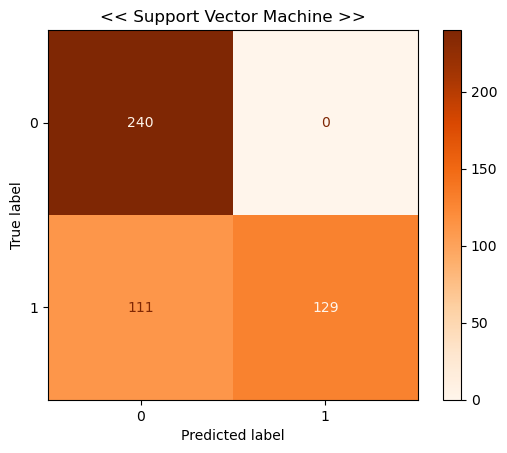

In [43]:
### 서포트 벡터 머신 ###
from sklearn.svm import SVC
import time
start = time.time()
#----------------------------------------------
svm_clf = SVC( C=1, gamma=10, random_state=0 )
svm_clf.fit( X_train_ROS, y_train_ROS )
svm_pred = svm_clf.predict( X_test_ROS )
svm_acc = svm_clf.score( X_test_ROS ,  y_test_ROS )
#----------------------------------------------
print("SVM training accuracy :", svm_clf.score( X_train_ROS , y_train_ROS )*100, "%")
print("SVM testing accuracy :", svm_acc * 100, "%")
#----------------------------------------------
print("--------------------------------------------------------------------------")
print(classification_report(y_test_ROS , svm_pred))
print("--------------------------------------------------------------------------")
print(confusion_matrix(y_test_ROS , svm_pred))
print("--------------------------------------------------------------------------")
#----------------------------------------------
plot_confusion_matrix(svm_clf, X_test_ROS,  y_test_ROS, cmap='Oranges')
plt.title("<< Support Vector Machine >>")

end = time.time() 
print('Execution time is:') 
print(end - start)

In [44]:
# Accuracy 데이터 프레임 생성
models_acc = {'Logistic Regression': lr_acc*100,              
              'SVM': svm_acc*100, 
              'LighGBM':lgbm_acc*100 , 
              'Random Forest': rnd_clf_acc*100 
              }

models_acc_df = pd.DataFrame(pd.Series(models_acc))
models_acc_df.columns = ['정확도']
models_acc_df['모델'] = ['Logistic Regression', 'SVM', 
                          'LighGBM', 'Random Forest']
models_acc_df.set_index(pd.Index([1, 2 , 3 , 4 ]))

정확도                   모델
1  48.958333  Logistic Regression
2  76.875000                  SVM
3  73.541667              LighGBM
4  77.291667        Random Forest

Text(0.5, 1.0, '<< Classifier Accuracy Comparison >>')

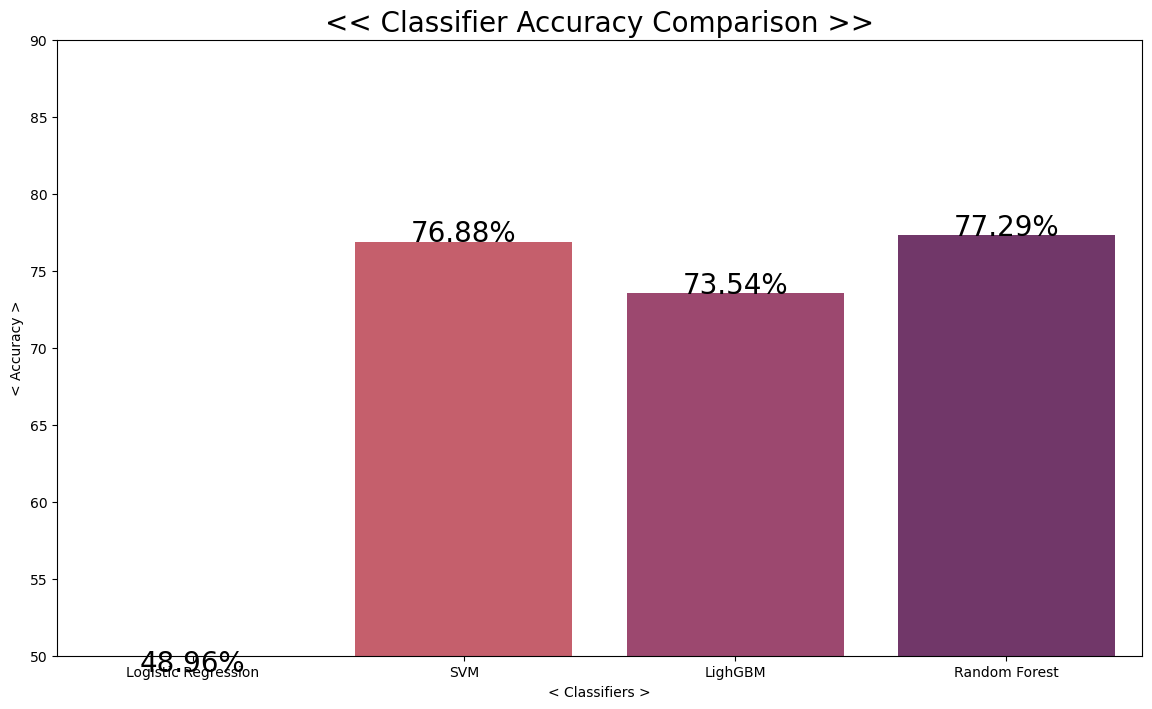

In [45]:
plt.figure(figsize=[14, 8])
axis = sns.barplot(x = '모델', y = '정확도', data = models_acc_df, palette="flare")
axis.set(xlabel='< Classifiers >', ylabel='< Accuracy >', ylim=(50, 90),)

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.2f}%'.format(height), ha="center" ,fontsize = 20)

plt.title("<< Classifier Accuracy Comparison >>", fontsize = 20)

# Raw Data 예측 

In [46]:
# Raw data
df

ph    Hardness        Solids  Chloramines     Sulfate  \
3      8.316766  214.373394  22018.417441     8.059332  356.886136   
4      9.092223  181.101509  17978.986339     6.546600  310.135738   
5      5.584087  188.313324  28748.687739     7.544869  326.678363   
6     10.223862  248.071735  28749.716544     7.513408  393.663396   
7      8.635849  203.361523  13672.091764     4.563009  303.309771   
...         ...         ...           ...          ...         ...   
3267   8.989900  215.047358  15921.412018     6.297312  312.931022   
3268   6.702547  207.321086  17246.920347     7.708117  304.510230   
3269  11.491011   94.812545  37188.826022     9.263166  258.930600   
3270   6.069616  186.659040  26138.780191     7.747547  345.700257   
3271   4.668102  193.681735  47580.991603     7.166639  359.948574   

      Conductivity  Organic_carbon  Trihalomethanes  Turbidity  Potability  
3       363.266516       18.436524       100.341674   4.628771           0  
4       398.410813       11.558279        31.997993   4.075075           0  
5       280.467916        8.399735        54.917862   2.559708           0  
6       283.651634       13.789695        84.603556   2.672989           0  
7       474.607645       12.363817        62.798309   4.401425           0  
...            ...             ...              ...        ...         ...  
3267    390.410231        9.899115        55.069304   4.613843           1  
3268    329.266002       16.217303        28.878601   3.442983           1  
3269    439.893618       16.172755        41.558501   4.369264           1  
3270    415.886955       12.067620        60.419921   3.669712           1  
3271    526.424171       13.894419        66.687695   4.435821           1  

[2011 rows x 10 columns]

In [47]:
X #스케일링 확인

ph  Hardness    Solids  Chloramines   Sulfate  Conductivity  \
3     0.782466  0.564114  0.011687     0.583804  0.574378     -0.783962   
4     1.275463 -0.455653 -0.455835    -0.370947 -0.560480     -0.348429   
5    -0.954835 -0.234614  0.790645     0.259104 -0.158911     -1.810063   
6     1.994902  1.596951  0.790764     0.239248  1.467140     -1.770608   
7     0.985323  0.226606 -0.954313    -1.622878 -0.726179      0.595858   
...        ...       ...       ...          ...       ...           ...   
3267  1.210411  0.584770 -0.693978    -0.528284 -0.492625     -0.447578   
3268 -0.243774  0.347964 -0.540564     0.362137 -0.697038     -1.205321   
3269  2.800492 -3.100365  1.767503     1.343596 -1.803476      0.165656   
3270 -0.646160 -0.285317  0.488576     0.387023  0.302843     -0.131852   
3271 -1.537172 -0.070075  2.970287     0.020386  0.648718      1.238006   

      Organic_carbon  Trihalomethanes  Turbidity  
3           1.227032         2.111652   0.844761  
4          -0.842154        -2.140399   0.135033  
5          -1.792340        -0.714423  -1.807366  
6          -0.170876         1.132494  -1.662163  
7          -0.599824        -0.224135   0.553348  
...              ...              ...        ...  
3267       -1.341281        -0.705001   0.825626  
3268        0.559422        -2.334474  -0.675183  
3269        0.546021        -1.545585   0.512125  
3270       -0.688929        -0.372108  -0.384562  
3271       -0.139372         0.017846   0.597437  

[2011 rows x 9 columns]

랜덤포레스트 Raw data Prdict accuracy : 94.6295375435107 %
--------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1200
           1       0.93      0.93      0.93       811

    accuracy                           0.95      2011
   macro avg       0.94      0.94      0.94      2011
weighted avg       0.95      0.95      0.95      2011

--------------------------------------------------------------------------
[[1147   53]
 [  55  756]]
--------------------------------------------------------------------------
Execution time is:
1.2193751335144043


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


Text(0.5, 1.0, '<< Predict Raw data (Random Forest) >>')

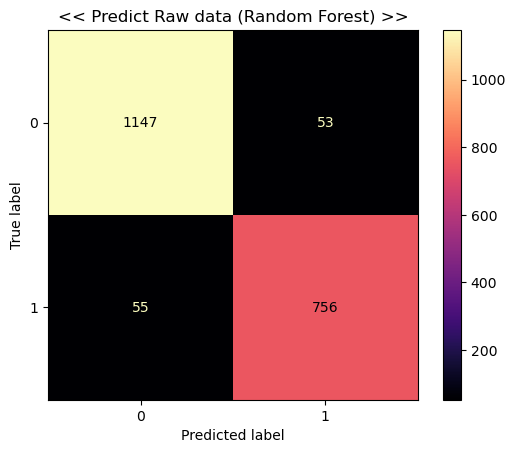

In [48]:
rnd_clf_pred = rnd_clf.predict( X ) #X_test 예측
rnd_clf_acc = rnd_clf.score( X , y ) # 정확도(Accuracy) 출력 
print("랜덤포레스트 Raw data Prdict accuracy :", rnd_clf_acc * 100, "%")
print("--------------------------------------------------------------------------")
print(classification_report(y, rnd_clf_pred))
print("--------------------------------------------------------------------------")
print(confusion_matrix(y, rnd_clf_pred))
print("--------------------------------------------------------------------------")
end = time.time() 
print('Execution time is:') 
print(end - start)
plot_confusion_matrix(rnd_clf, X, y, cmap='magma' )
plt.title("<< Predict Raw data (Random Forest) >>")